# First try at water quality prediction

In [1]:
import pandas as pd

In [2]:
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
kaggle_test = pd.read_csv(kaggle_test_url, delimiter=',')

In [3]:
df.head()

,station_id,Aluminium_2019,Aluminium_2020,Ammonium_2019,Ammonium_2020,Boron_2019,Boron_2020,Chloride_2019,Chloride_2020,Coli-like-bacteria-Colilert_2019,...,Taste-ball-units_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,487,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,1.6,0.2,7.80,7.60,0,0,0
1,1555,NaN,NaN,0.05,0.05,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.30,7.10,0,0,0
2,205,NaN,10.0,0.05,0.24,NaN,0.100,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,7.80,7.70,0,0,0
3,1228,NaN,NaN,0.09,0.05,0.641,0.932,NaN,NaN,NaN,...,1.0,NaN,NaN,0.5,0.5,7.44,7.58,0,0,0
4,470,NaN,NaN,0.06,0.05,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.2,44.0,7.70,8.00,0,1,0


Preprocessing

In [4]:
df = df.fillna(0)
df = df.drop('station_id', axis=1)

<AxesSubplot:>

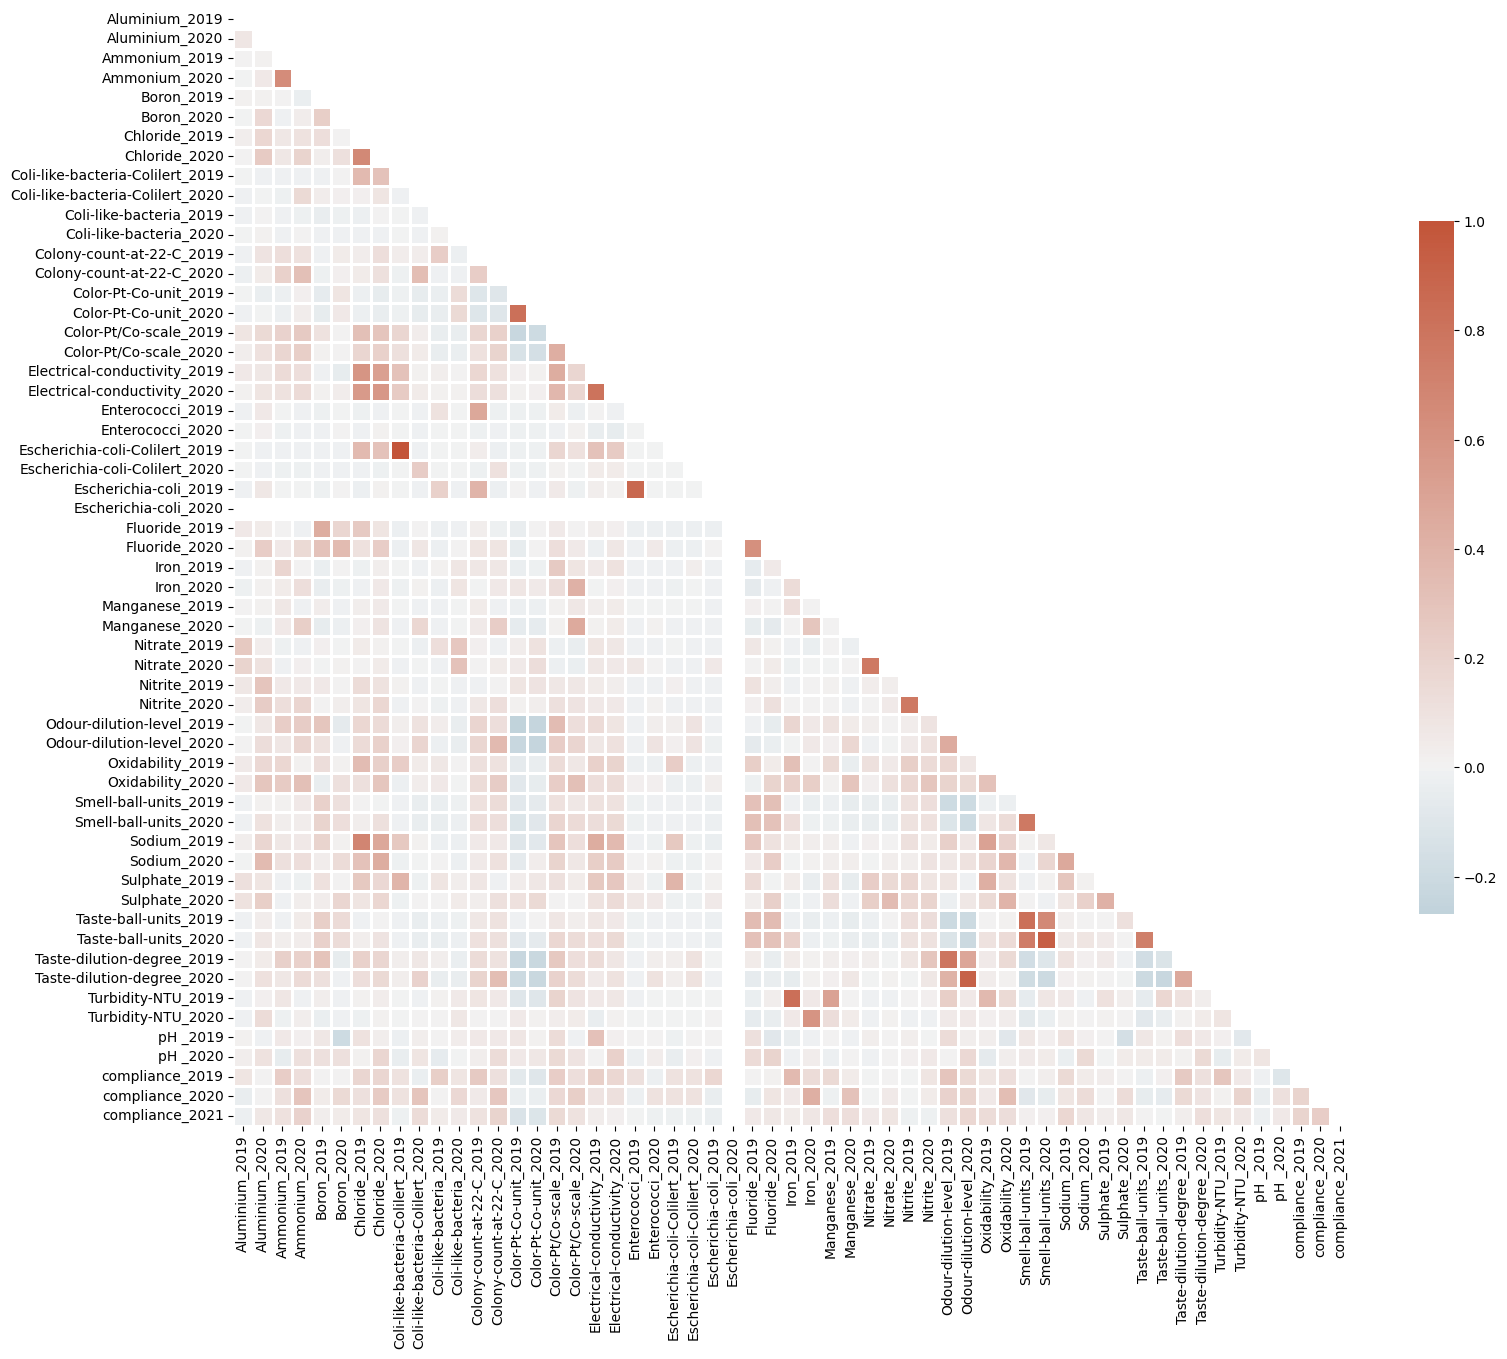

In [5]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

Models

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('compliance_2021', axis=1)
y = df['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

kaggle_test_copy = kaggle_test.drop('station_id', axis=1)
kaggle_test_copy = kaggle_test_copy.fillna(0)
pred = model.predict(kaggle_test_copy)

# this is just predicting everything as 0 and scored a 0.9
# completely worthless at predicting which stations need compliance testing
# need to consider balancing the data, do something with false positives/negatives (auc, accuracy, recall, f1?)
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('svc_rbf.csv', index=False)

In [8]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

model.predict(kaggle_test_copy)
# pred = model.predict(kaggle_test_copy)
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
# submission.to_csv('svc_linear.csv', index=False)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [9]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

# pred = model.predict(xgb.DMatrix(kaggle_test_copy))
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': np.round(pred)})
# submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.86096	eval-auc:0.59485
[1]	train-auc:0.90498	eval-auc:0.60855
[2]	train-auc:0.91620	eval-auc:0.58662
[3]	train-auc:0.92574	eval-auc:0.54715
[4]	train-auc:0.94314	eval-auc:0.60526
[5]	train-auc:0.97058	eval-auc:0.61678
[6]	train-auc:0.97850	eval-auc:0.64583
[7]	train-auc:0.99146	eval-auc:0.64309
[8]	train-auc:0.99459	eval-auc:0.63651
[9]	train-auc:0.99689	eval-auc:0.61623
[10]	train-auc:0.99814	eval-auc:0.61513
[11]	train-auc:0.99851	eval-auc:0.60746
[12]	train-auc:0.99826	eval-auc:0.60197
[13]	train-auc:0.99882	eval-auc:0.60307
[14]	train-auc:0.99938	eval-auc:0.60746
[15]	train-auc:0.99975	eval-auc:0.61952
[16]	train-auc:0.99994	eval-auc:0.64254
[17]	train-auc:1.00000	eval-auc:0.64364
[18]	train-auc:1.00000	eval-auc:0.63596
[19]	train-auc:1.00000	eval-auc:0.63158
[20]	train-auc:1.00000	eval-auc:0.62829
[21]	train-auc:1.00000	eval-auc:0.63158
[22]	train-auc:1.00000	eval-auc:0.63158
[23]	train-auc:1.00000	eval-auc:0.62500
[24]	train-auc:1.00000	eval-auc:0.61732
[25]	train

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[52]	train-auc:1.00000	eval-auc:0.63268
[53]	train-auc:1.00000	eval-auc:0.63048
[54]	train-auc:1.00000	eval-auc:0.63048
[55]	train-auc:1.00000	eval-auc:0.62829


In [10]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'error', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)


#pred = model.predict(xgb.DMatrix(kaggle_test_copy))
#submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': np.round(pred)})
#submission.to_csv('xgb_error.csv', index=False)

[0]	train-error:0.07955	eval-error:0.21591
[1]	train-error:0.06818	eval-error:0.20455
[2]	train-error:0.06534	eval-error:0.19318
[3]	train-error:0.05114	eval-error:0.19318
[4]	train-error:0.04261	eval-error:0.19318
[5]	train-error:0.03693	eval-error:0.17045
[6]	train-error:0.03409	eval-error:0.15909
[7]	train-error:0.02557	eval-error:0.15909
[8]	train-error:0.02557	eval-error:0.15909
[9]	train-error:0.02273	eval-error:0.15909
[10]	train-error:0.01705	eval-error:0.17045
[11]	train-error:0.01420	eval-error:0.17045
[12]	train-error:0.01136	eval-error:0.17045
[13]	train-error:0.00852	eval-error:0.15909
[14]	train-error:0.00852	eval-error:0.17045
[15]	train-error:0.00852	eval-error:0.15909
[16]	train-error:0.00568	eval-error:0.17045
[17]	train-error:0.00568	eval-error:0.17045
[18]	train-error:0.00568	eval-error:0.17045
[19]	train-error:0.00284	eval-error:0.17045
[20]	train-error:0.00284	eval-error:0.17045
[21]	train-error:0.00284	eval-error:0.17045
[22]	train-error:0.00284	eval-error:0.1704

# 2 different fillna strategy

In [11]:
import pandas as pd
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
kaggle_test = pd.read_csv(kaggle_test_url, delimiter=',')

<AxesSubplot:>

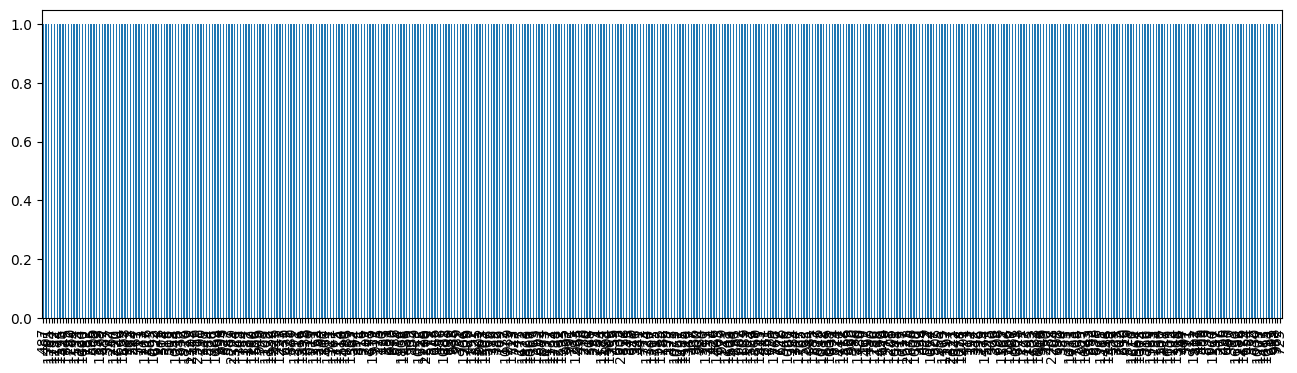

station_id - min:165, max:2311, mean:847.8840909090909, median:741.0
--------------


<AxesSubplot:>

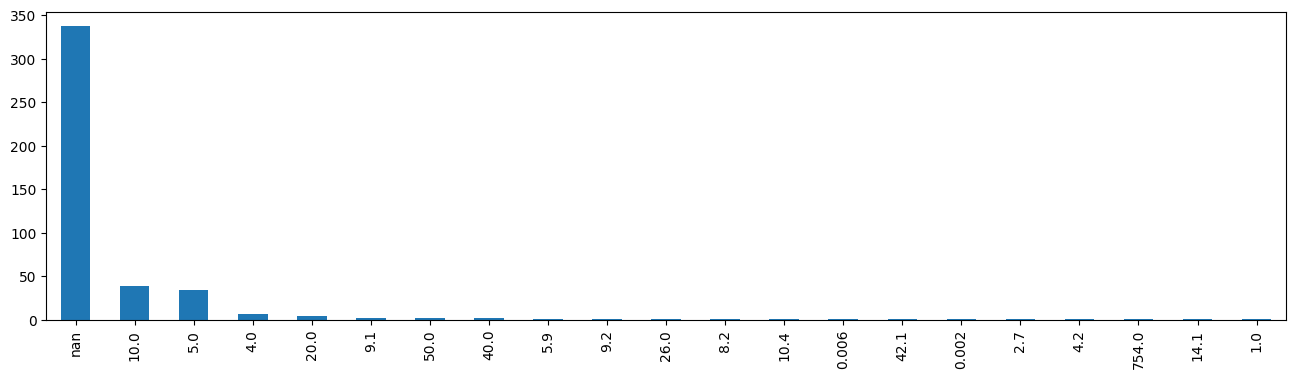

Aluminium_2019 - min:0.002, max:754.0, mean:16.93211650485437, median:10.0
--------------


<AxesSubplot:>

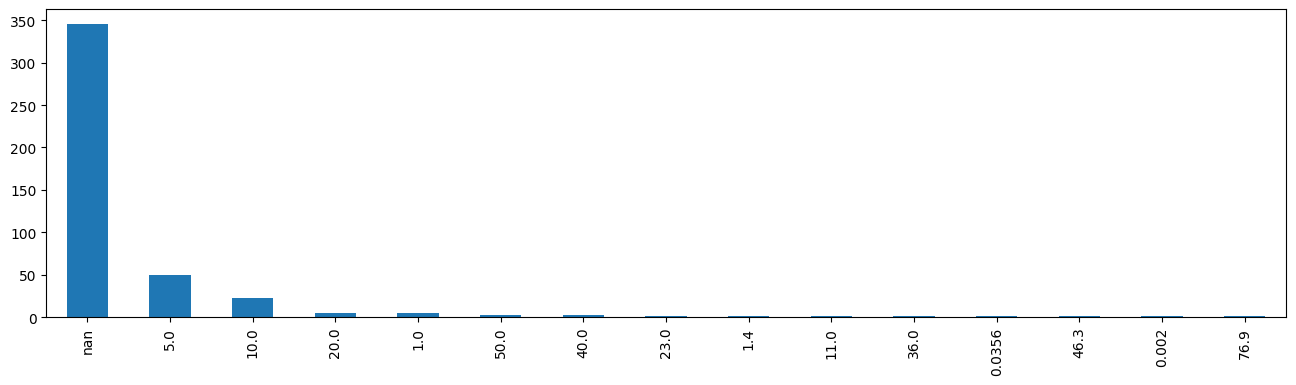

Aluminium_2020 - min:0.002, max:76.9, mean:10.102527659574466, median:5.0
--------------


<AxesSubplot:>

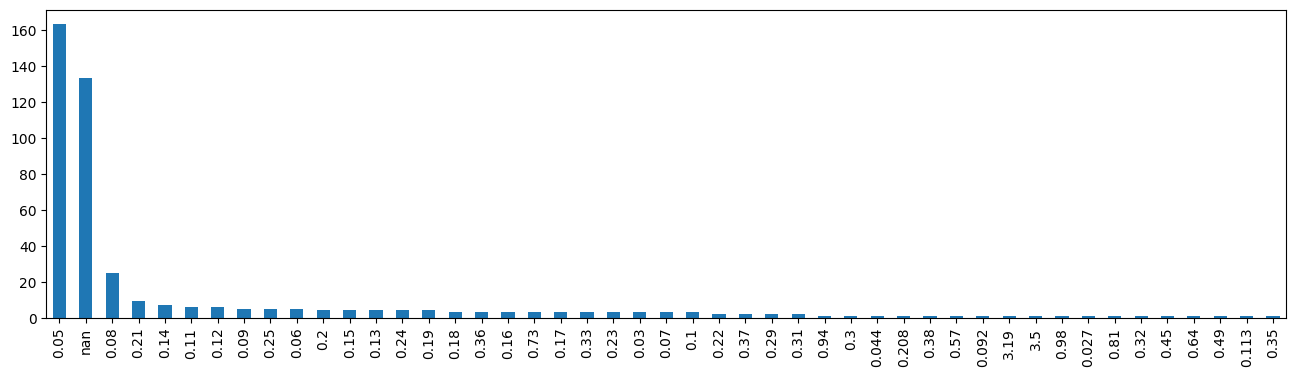

Ammonium_2019 - min:0.027, max:3.5, mean:0.13975244299674267, median:0.05
--------------


<AxesSubplot:>

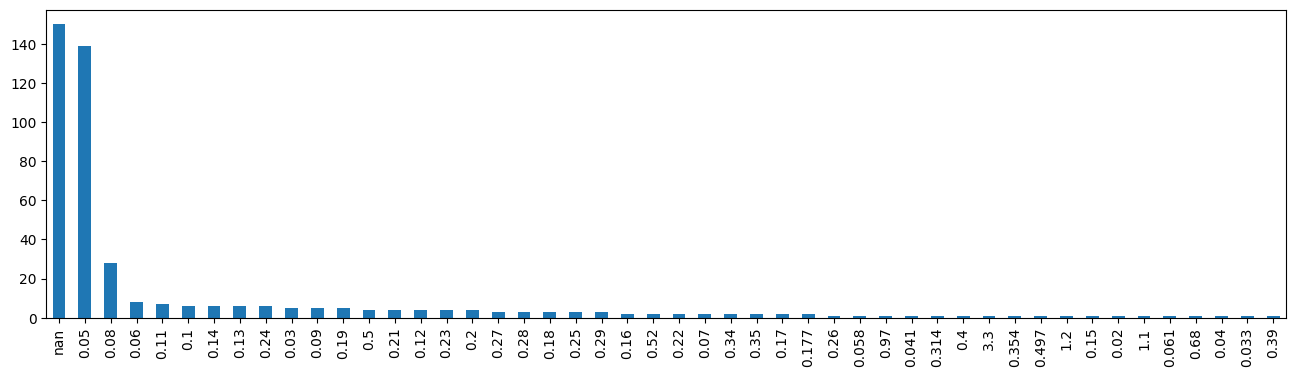

Ammonium_2020 - min:0.02, max:3.3, mean:0.13235172413793106, median:0.05
--------------


<AxesSubplot:>

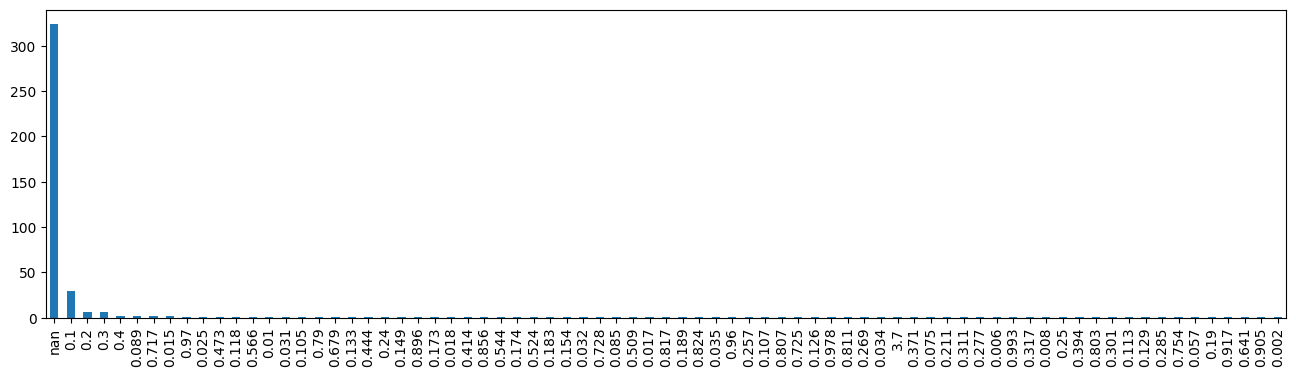

Boron_2019 - min:0.002, max:3.7, mean:0.32181896551724143, median:0.1785
--------------


<AxesSubplot:>

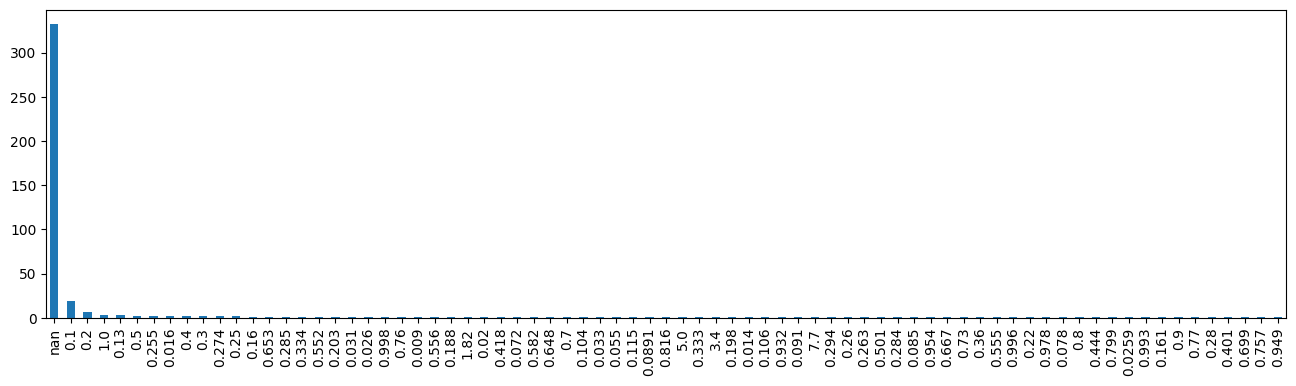

Boron_2020 - min:0.009, max:7.7, mean:0.4970833333333334, median:0.2525
--------------


<AxesSubplot:>

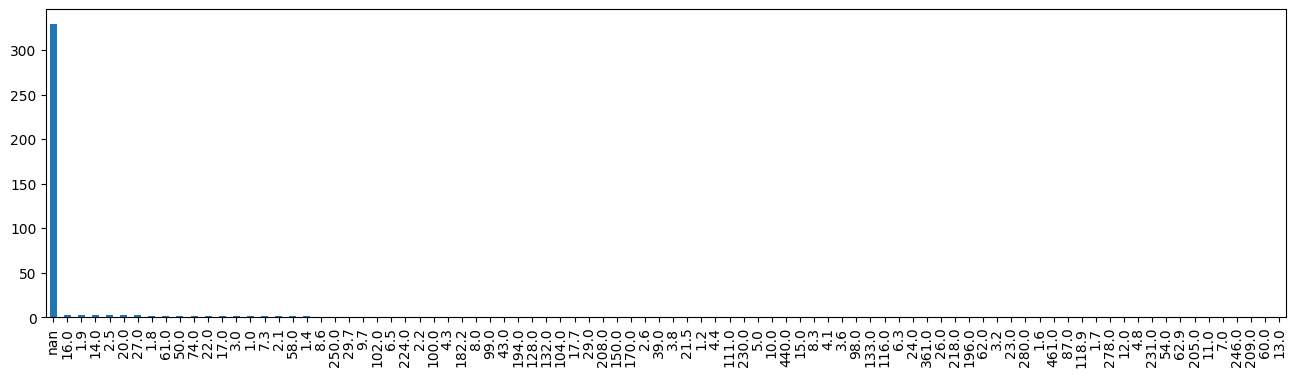

Chloride_2019 - min:1.0, max:461.0, mean:68.04684684684685, median:21.5
--------------


<AxesSubplot:>

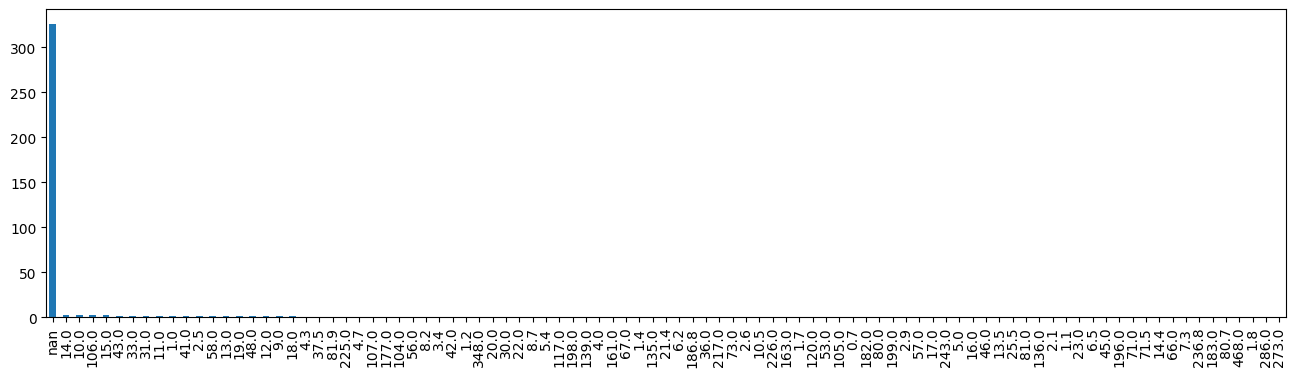

Chloride_2020 - min:0.7, max:468.0, mean:66.51491228070175, median:31.0
--------------


<AxesSubplot:>

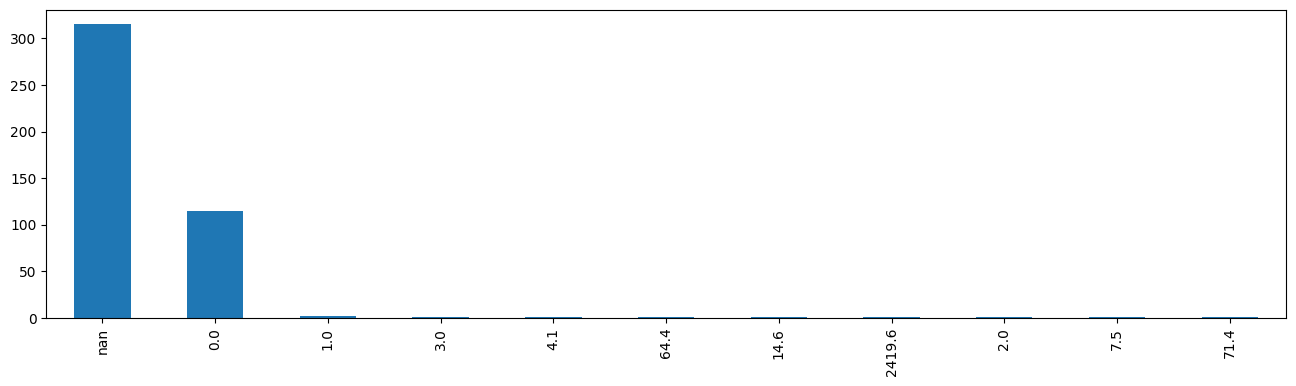

Coli-like-bacteria-Colilert_2019 - min:0.0, max:2419.6, mean:20.7088, median:0.0
--------------


<AxesSubplot:>

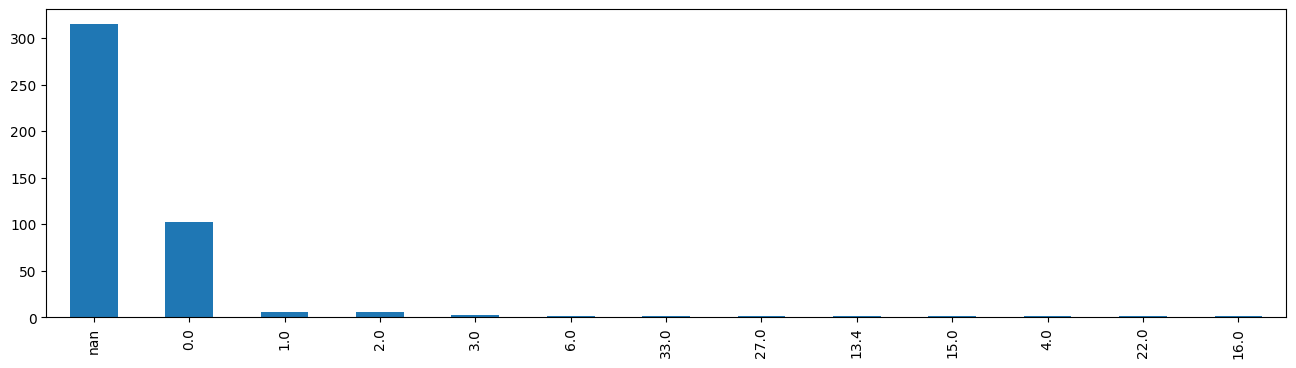

Coli-like-bacteria-Colilert_2020 - min:0.0, max:33.0, mean:1.3072000000000001, median:0.0
--------------


<AxesSubplot:>

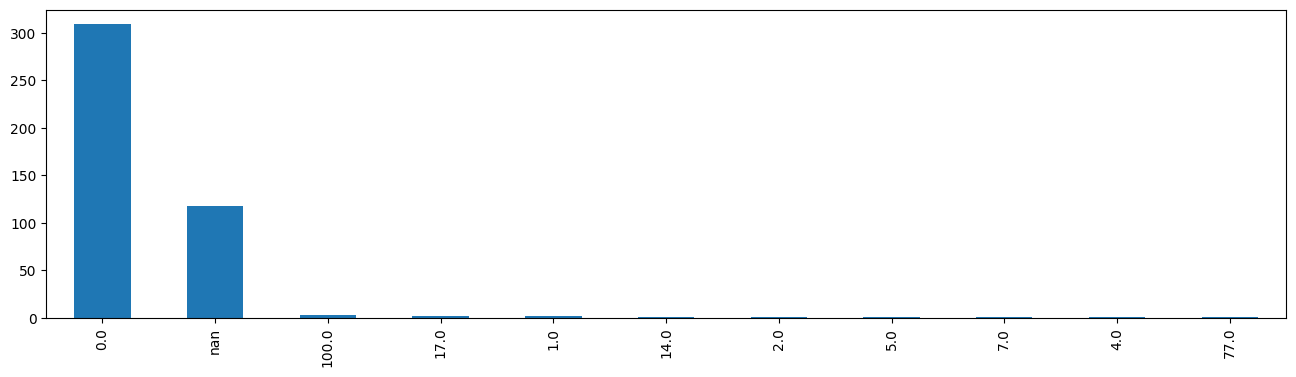

Coli-like-bacteria_2019 - min:0.0, max:100.0, mean:1.3819875776397517, median:0.0
--------------


<AxesSubplot:>

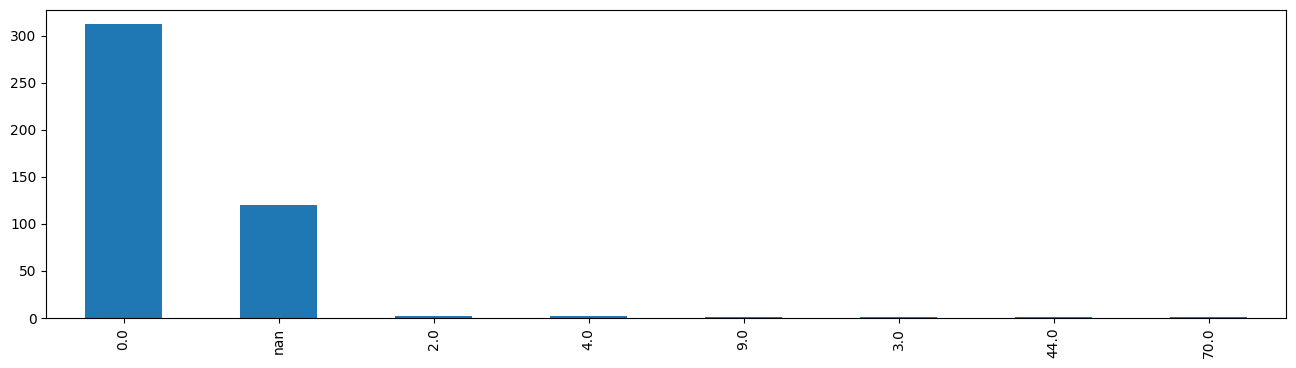

Coli-like-bacteria_2020 - min:0.0, max:70.0, mean:0.43125, median:0.0
--------------


<AxesSubplot:>

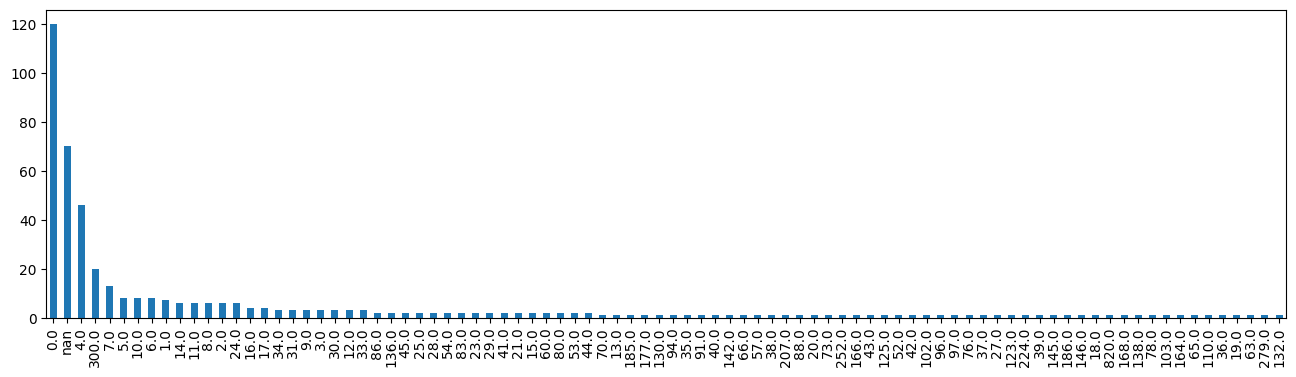

Colony-count-at-22-C_2019 - min:0.0, max:820.0, mean:39.82432432432432, median:5.0
--------------


<AxesSubplot:>

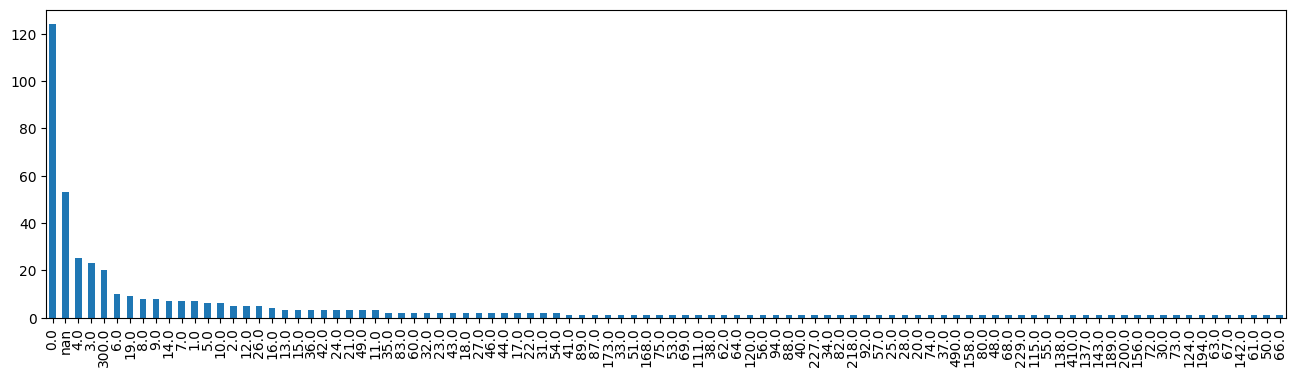

Colony-count-at-22-C_2020 - min:0.0, max:490.0, mean:38.012919896640824, median:6.0
--------------


<AxesSubplot:>

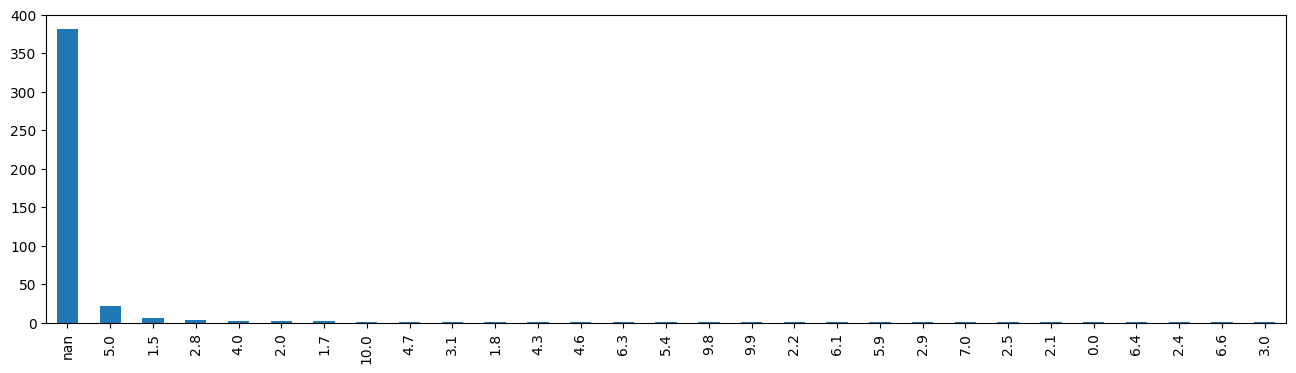

Color-Pt-Co-unit_2019 - min:0.0, max:10.0, mean:4.233898305084746, median:5.0
--------------


<AxesSubplot:>

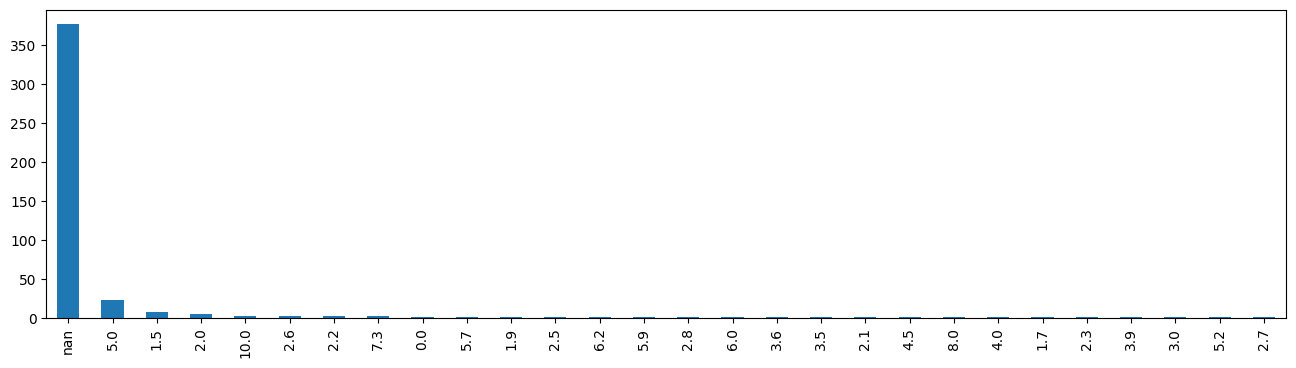

Color-Pt-Co-unit_2020 - min:0.0, max:10.0, mean:4.0507936507936515, median:5.0
--------------


<AxesSubplot:>

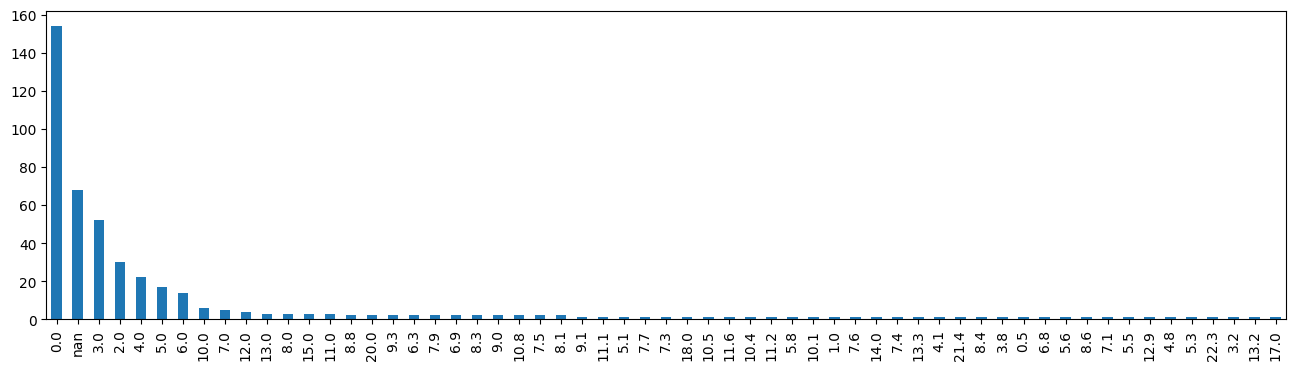

Color-Pt/Co-scale_2019 - min:0.0, max:22.3, mean:3.4260752688172045, median:2.5
--------------


<AxesSubplot:>

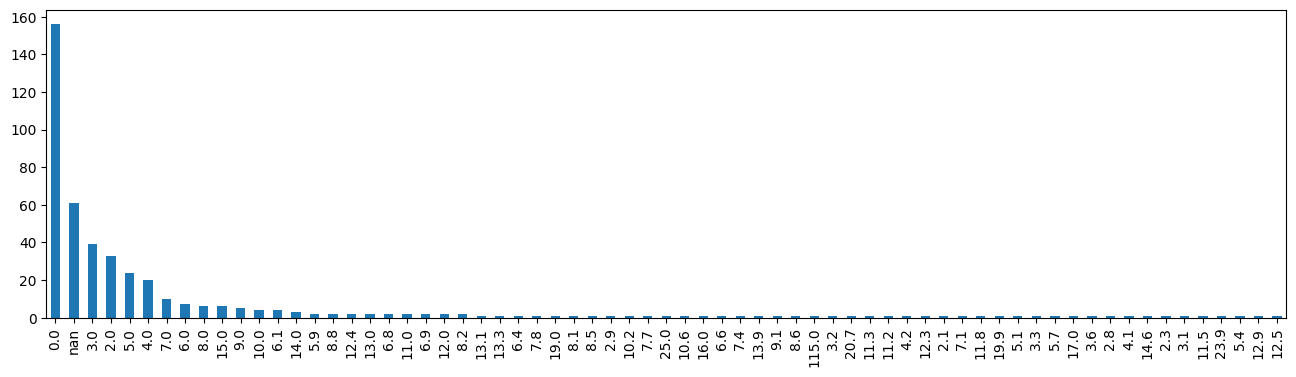

Color-Pt/Co-scale_2020 - min:0.0, max:115.0, mean:3.945118733509234, median:2.1
--------------


<AxesSubplot:>

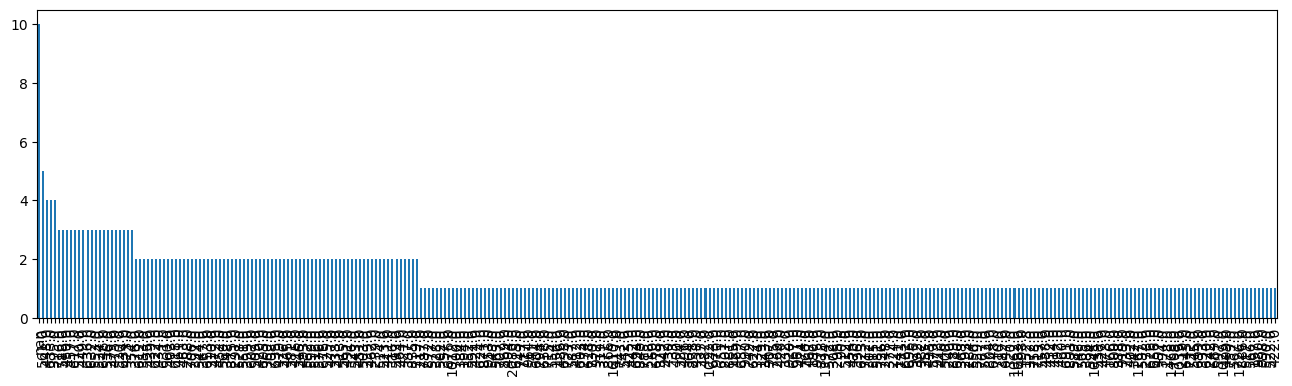

Electrical-conductivity_2019 - min:33.0, max:2080.0, mean:553.7009302325581, median:525.0
--------------


<AxesSubplot:>

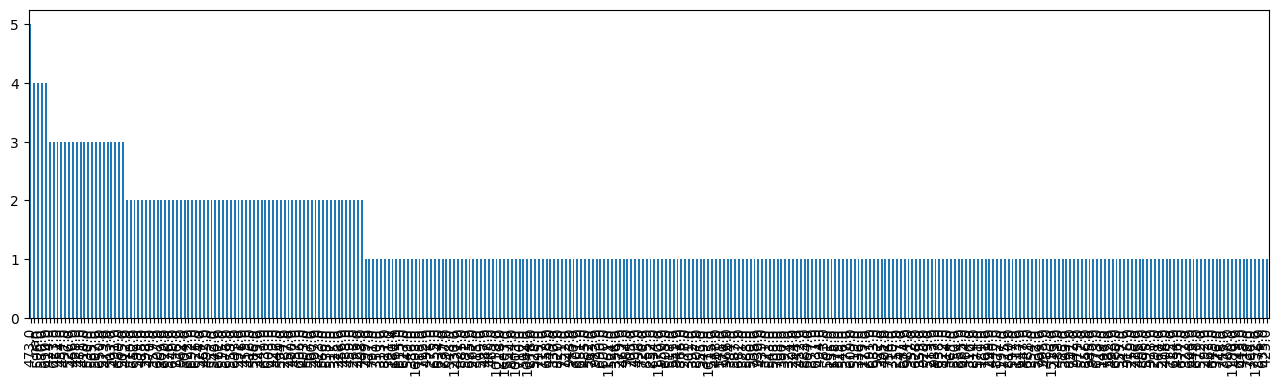

Electrical-conductivity_2020 - min:63.0, max:1752.0, mean:566.0077981651376, median:538.0
--------------


<AxesSubplot:>

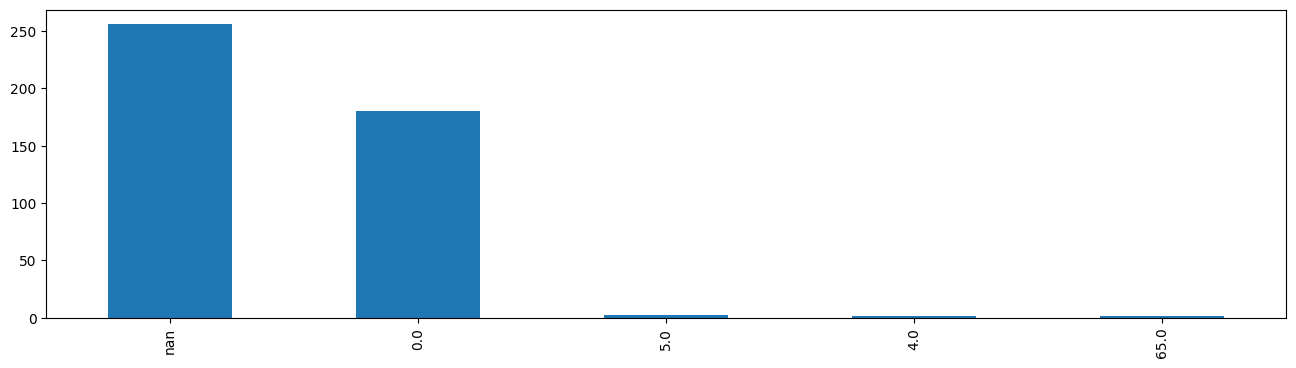

Enterococci_2019 - min:0.0, max:65.0, mean:0.42934782608695654, median:0.0
--------------


<AxesSubplot:>

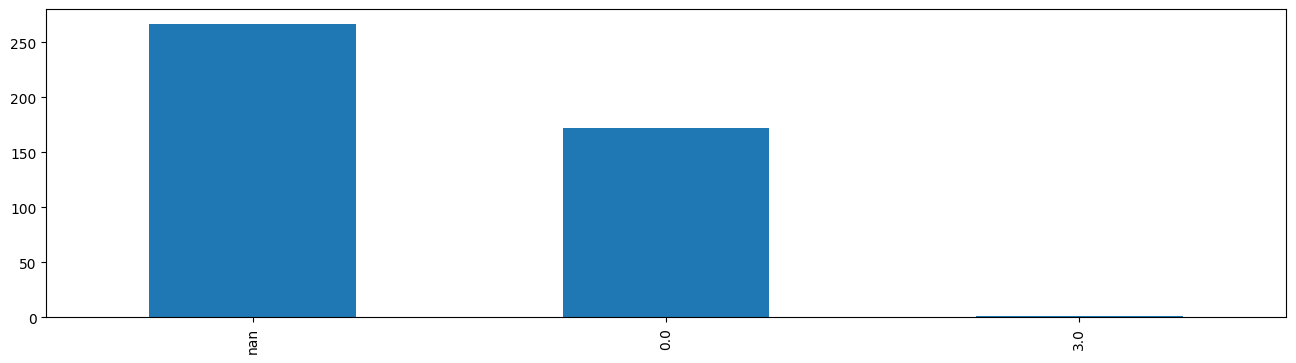

Enterococci_2020 - min:0.0, max:3.0, mean:0.017341040462427744, median:0.0
--------------


<AxesSubplot:>

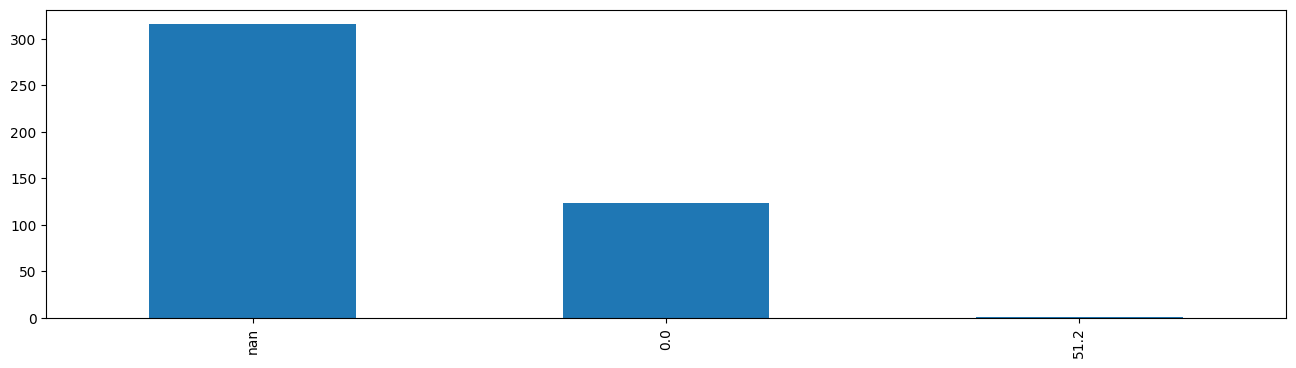

Escherichia-coli-Colilert_2019 - min:0.0, max:51.2, mean:0.4129032258064516, median:0.0
--------------


<AxesSubplot:>

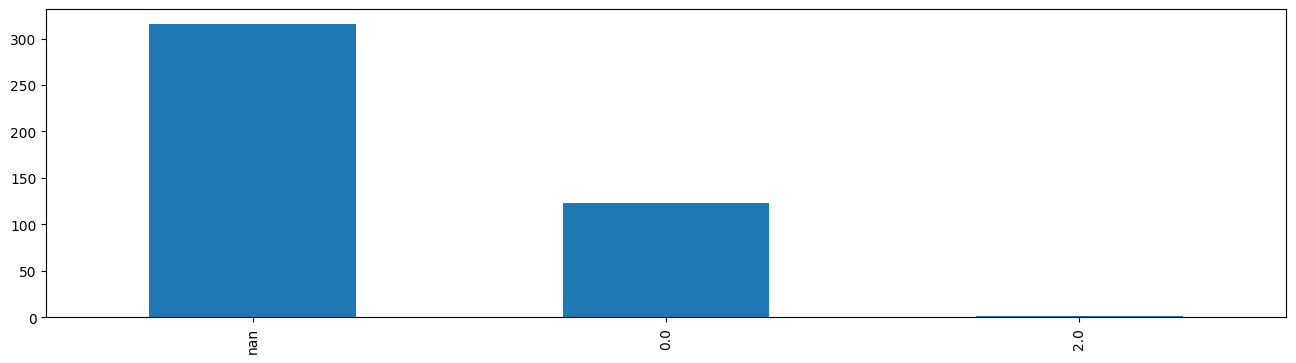

Escherichia-coli-Colilert_2020 - min:0.0, max:2.0, mean:0.016129032258064516, median:0.0
--------------


<AxesSubplot:>

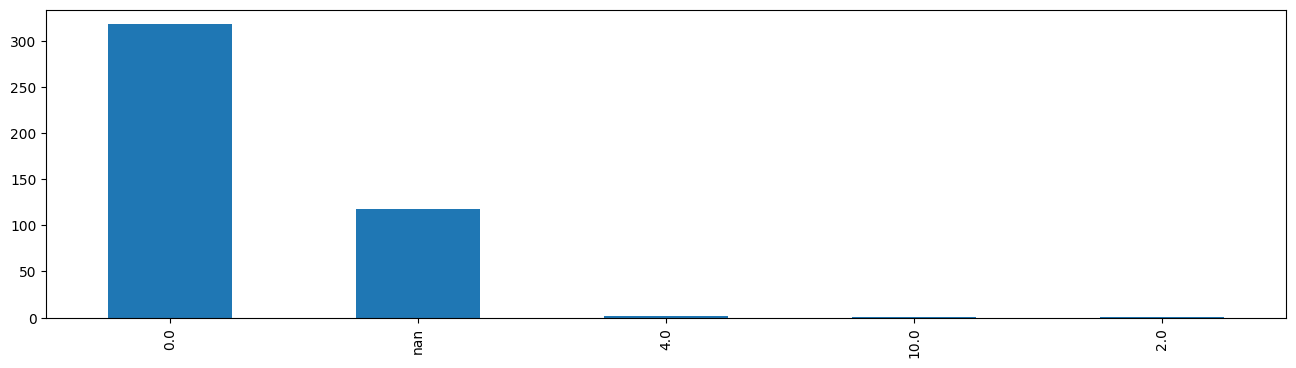

Escherichia-coli_2019 - min:0.0, max:10.0, mean:0.062111801242236024, median:0.0
--------------


<AxesSubplot:>

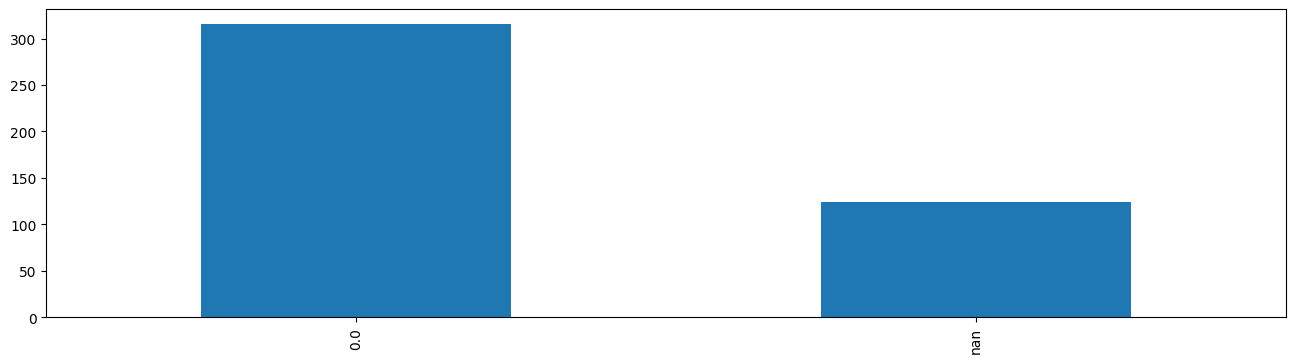

Escherichia-coli_2020 - min:0.0, max:0.0, mean:0.0, median:0.0
--------------


<AxesSubplot:>

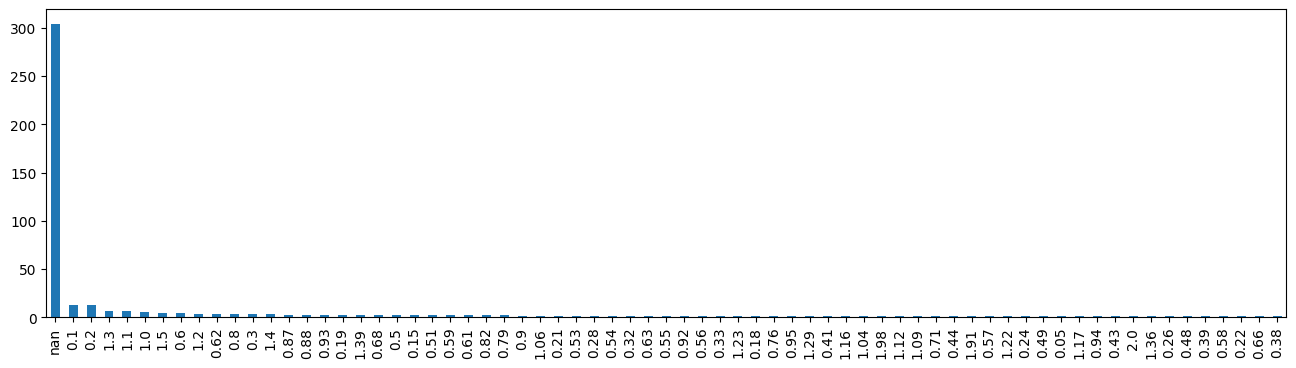

Fluoride_2019 - min:0.05, max:2.0, mean:0.708235294117647, median:0.62
--------------


<AxesSubplot:>

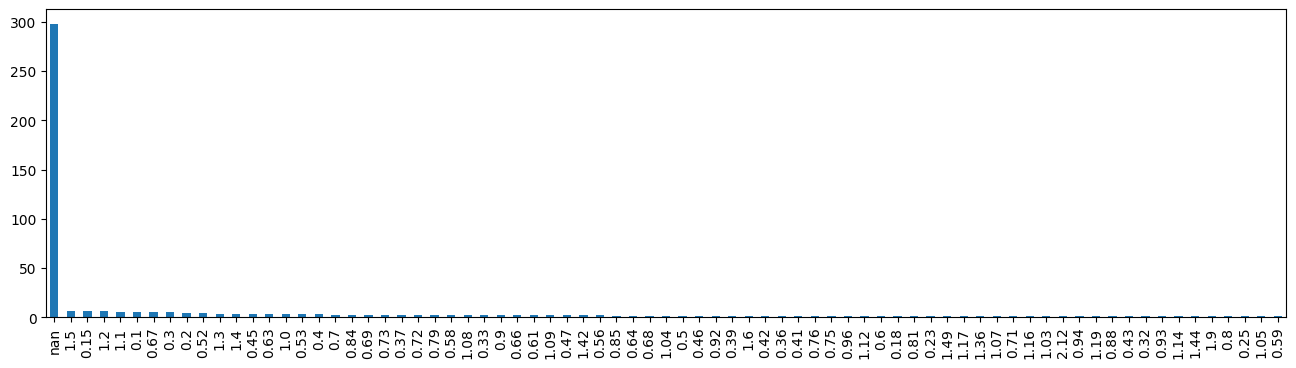

Fluoride_2020 - min:0.1, max:2.12, mean:0.7654225352112676, median:0.69
--------------


<AxesSubplot:>

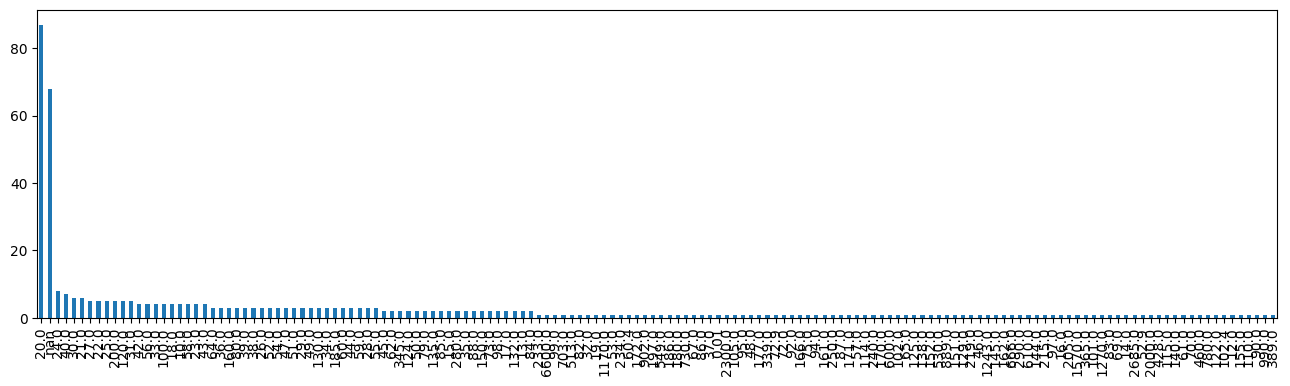

Iron_2019 - min:0.01, max:6600.0, mean:136.87798387096774, median:41.0
--------------


<AxesSubplot:>

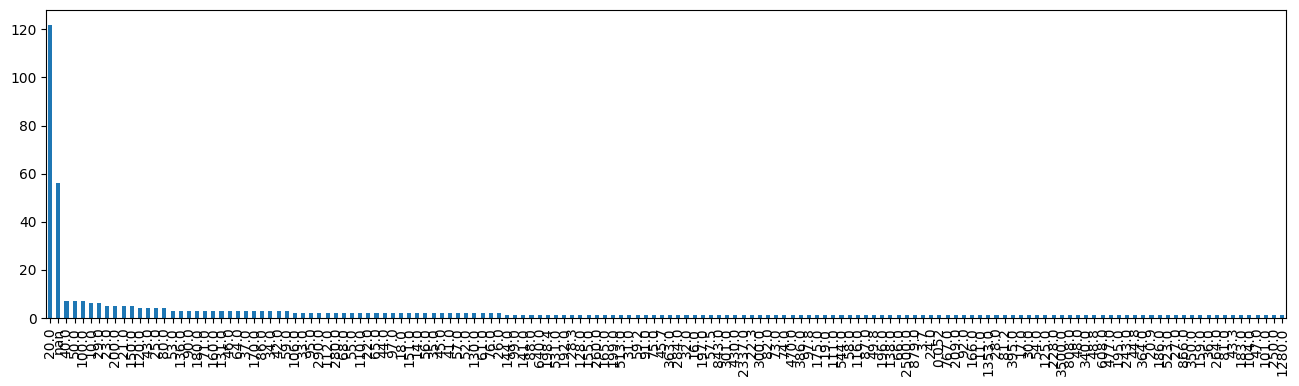

Iron_2020 - min:0.052, max:3500.0, mean:117.89258333333333, median:42.0
--------------


<AxesSubplot:>

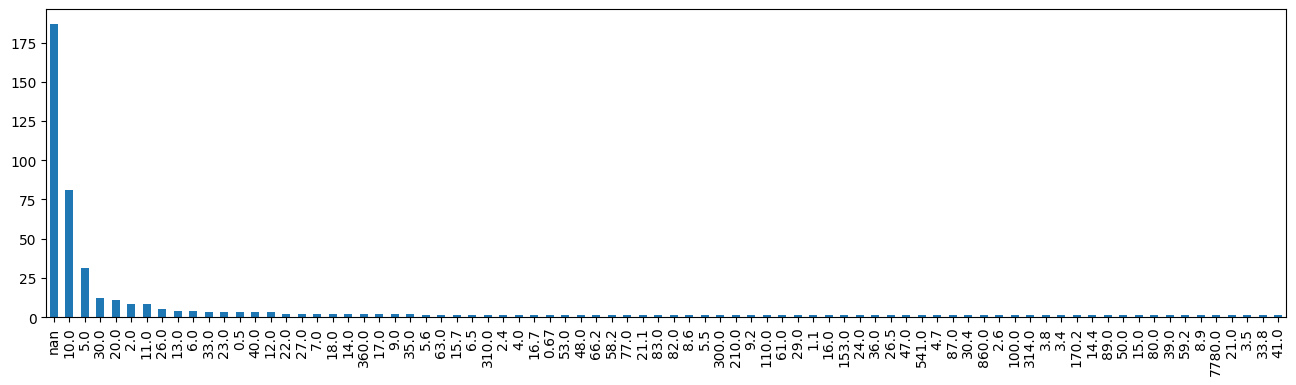

Manganese_2019 - min:0.5, max:7780.0, mean:61.266284584980234, median:10.0
--------------


<AxesSubplot:>

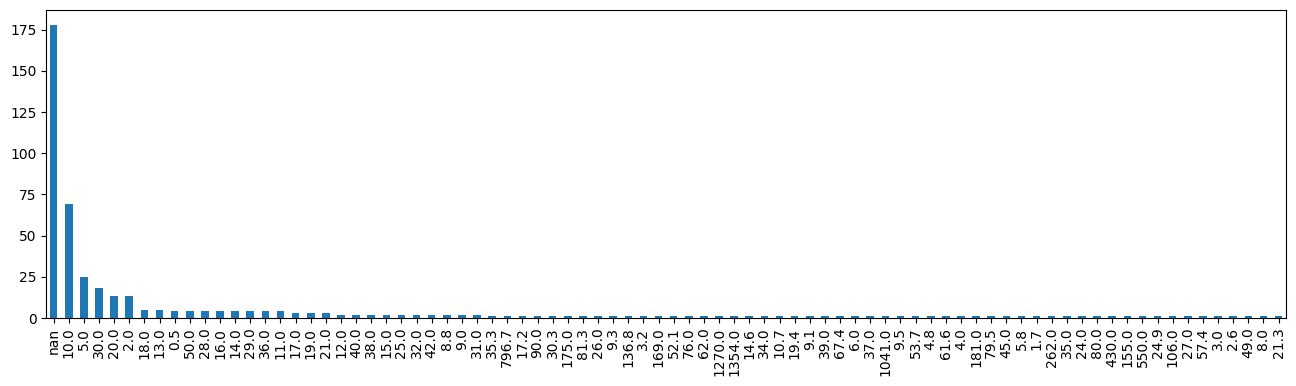

Manganese_2020 - min:0.5, max:1354.0, mean:42.57557251908397, median:11.0
--------------


<AxesSubplot:>

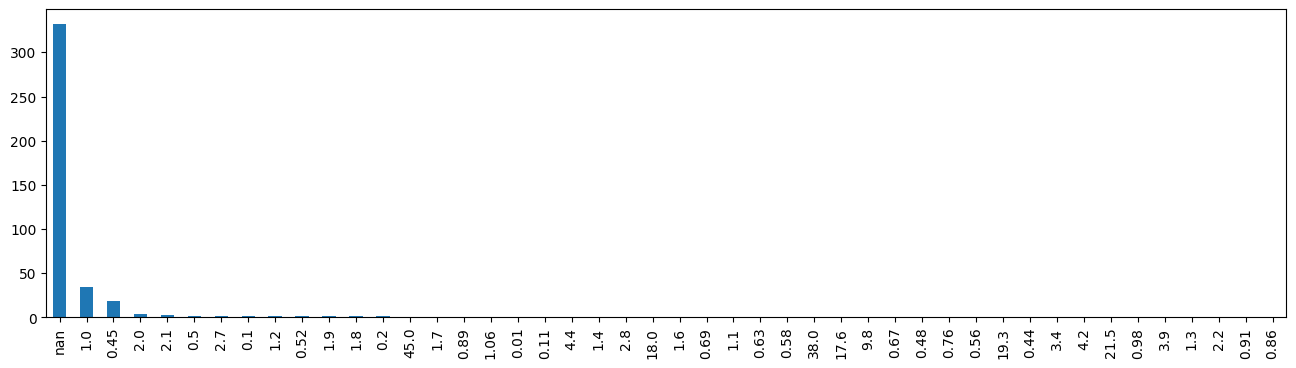

Nitrate_2019 - min:0.01, max:45.0, mean:2.6025, median:1.0
--------------


<AxesSubplot:>

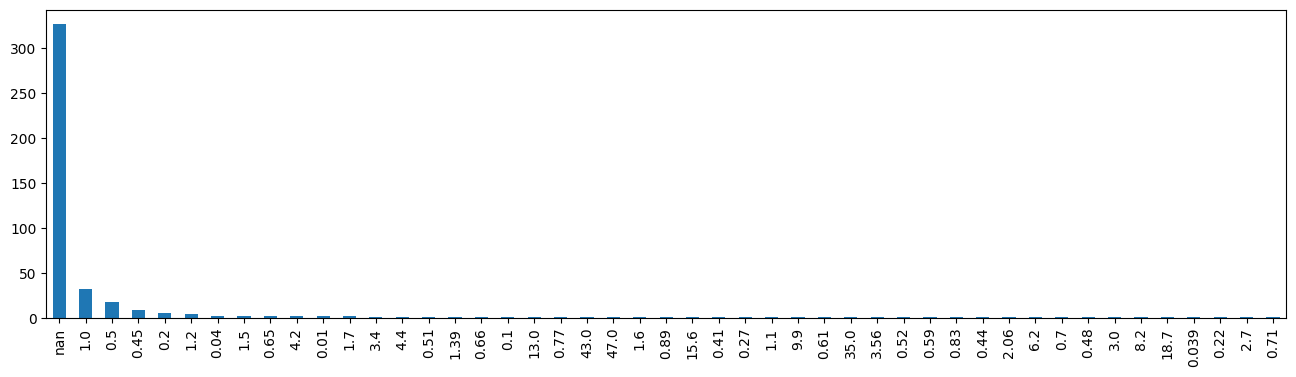

Nitrate_2020 - min:0.01, max:47.0, mean:2.5886754385964914, median:1.0
--------------


<AxesSubplot:>

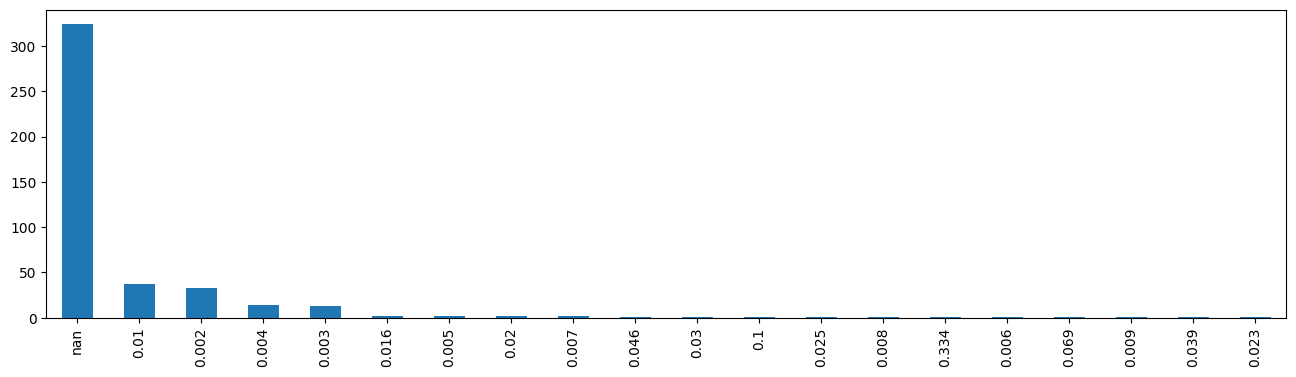

Nitrite_2019 - min:0.002, max:0.334, mean:0.011344827586206897, median:0.004
--------------


<AxesSubplot:>

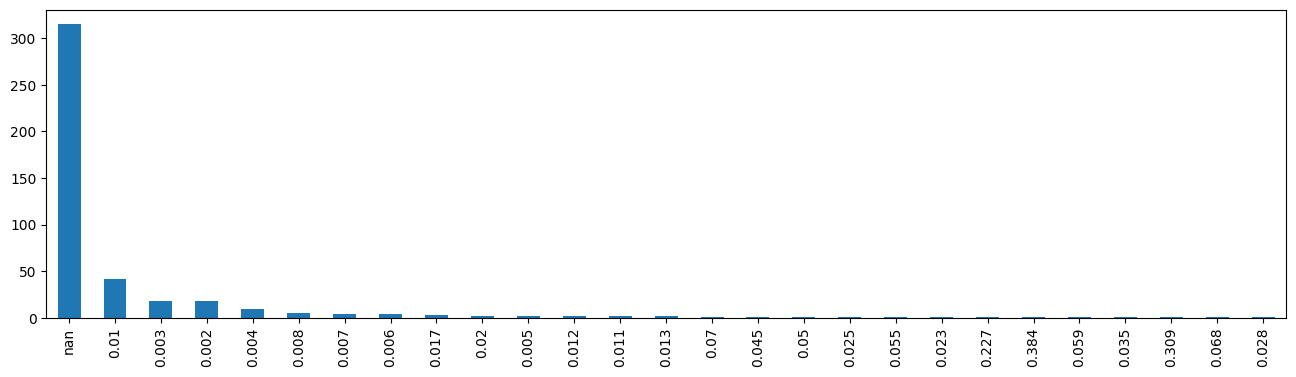

Nitrite_2020 - min:0.002, max:0.384, mean:0.017432000000000003, median:0.01
--------------


<AxesSubplot:>

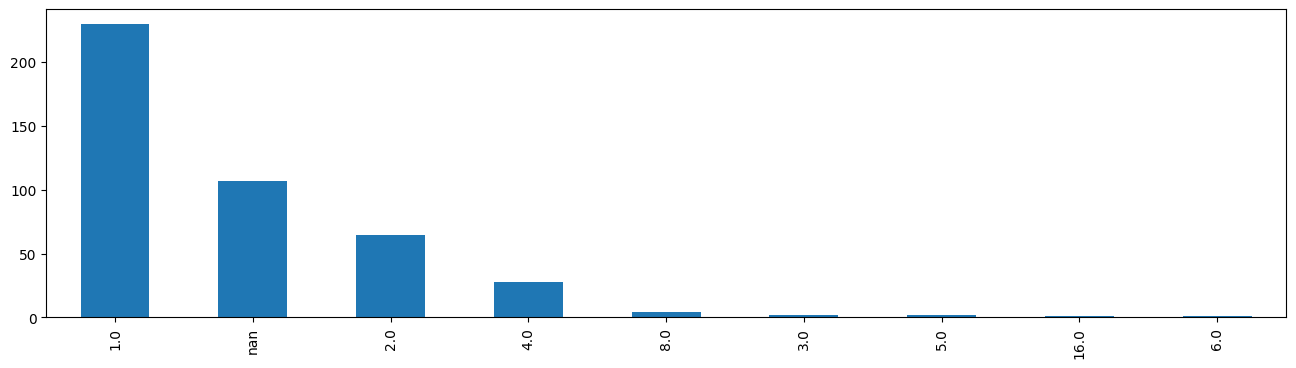

Odour-dilution-level_2019 - min:1.0, max:16.0, mean:1.6276276276276276, median:1.0
--------------


<AxesSubplot:>

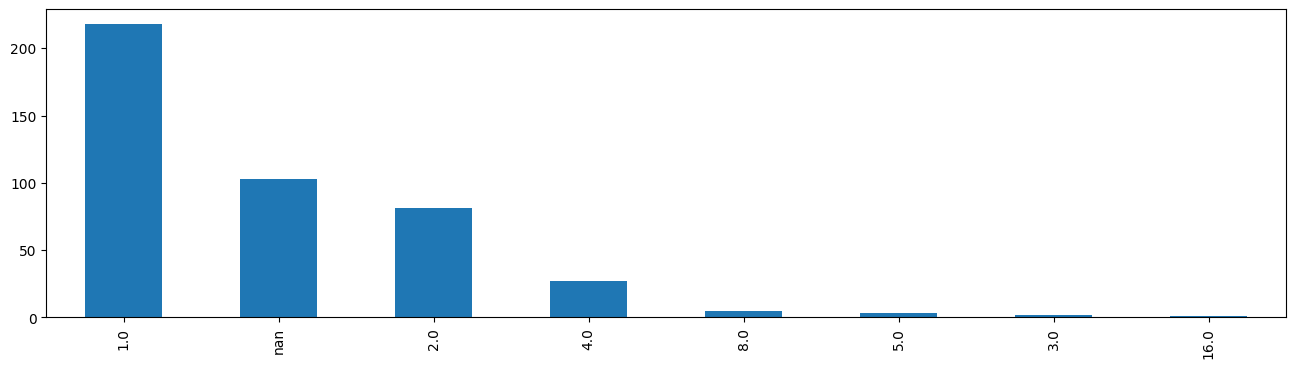

Odour-dilution-level_2020 - min:1.0, max:16.0, mean:1.6765578635014837, median:1.0
--------------


<AxesSubplot:>

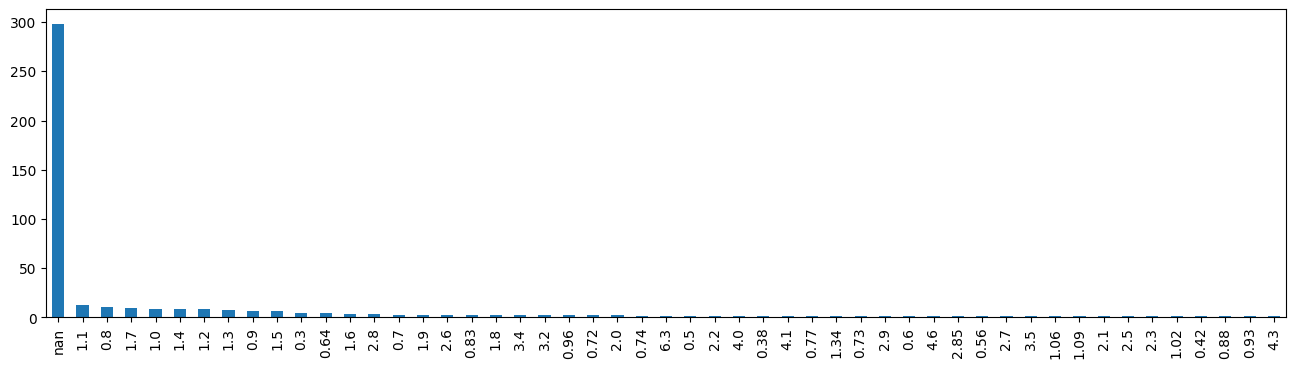

Oxidability_2019 - min:0.3, max:6.3, mean:1.4496478873239438, median:1.2
--------------


<AxesSubplot:>

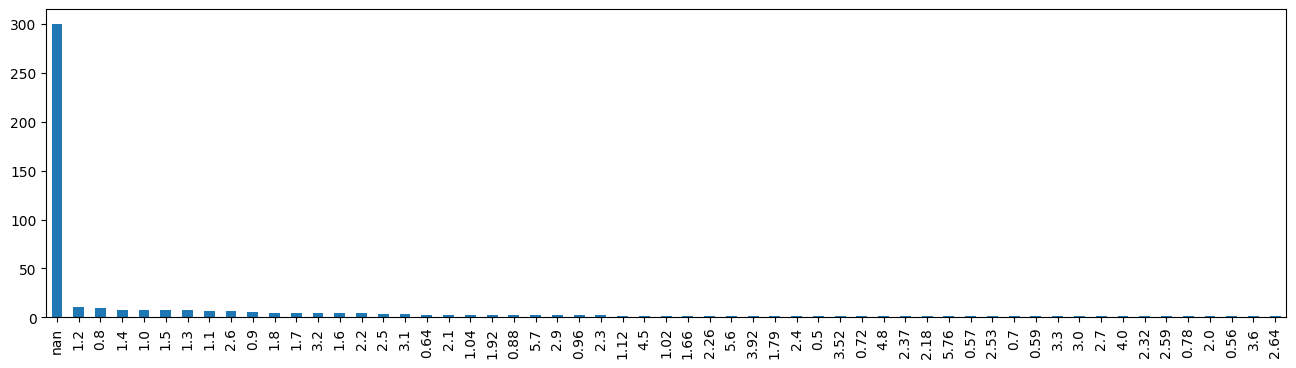

Oxidability_2020 - min:0.5, max:5.76, mean:1.8227142857142857, median:1.5
--------------


<AxesSubplot:>

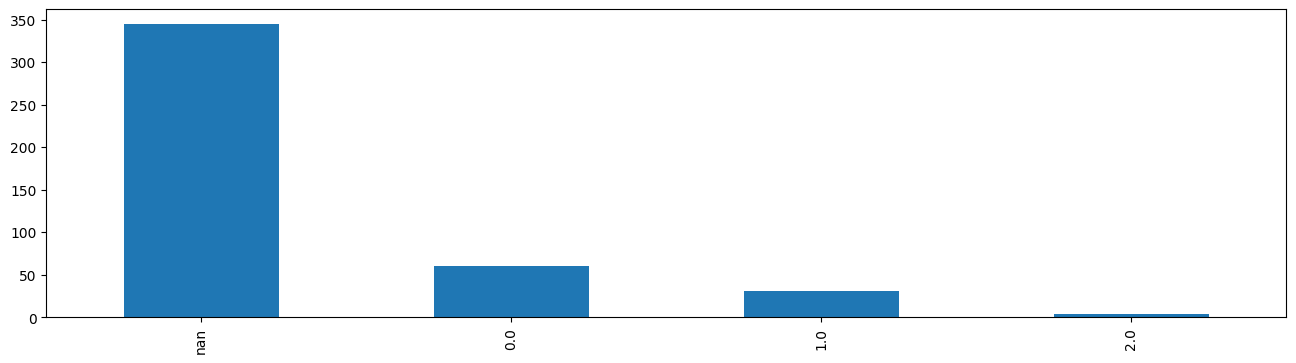

Smell-ball-units_2019 - min:0.0, max:2.0, mean:0.4105263157894737, median:0.0
--------------


<AxesSubplot:>

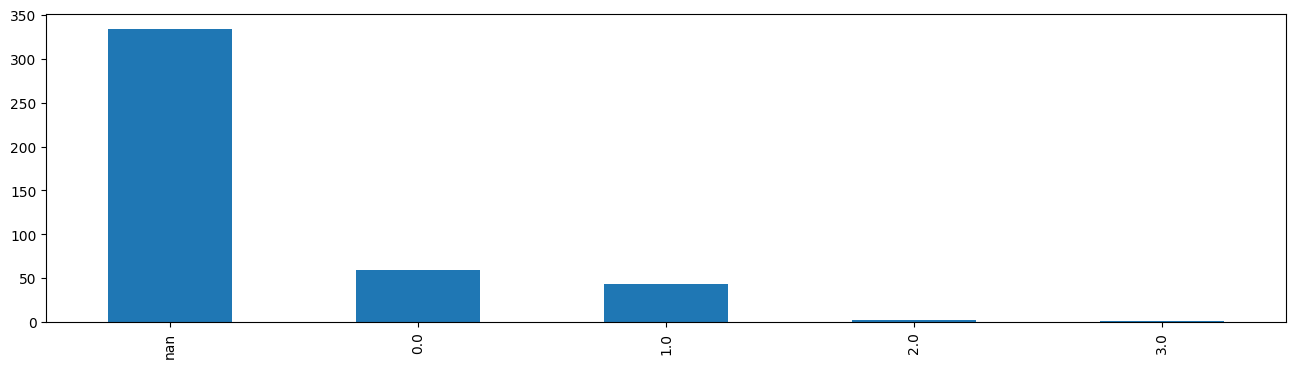

Smell-ball-units_2020 - min:0.0, max:3.0, mean:0.49056603773584906, median:0.0
--------------


<AxesSubplot:>

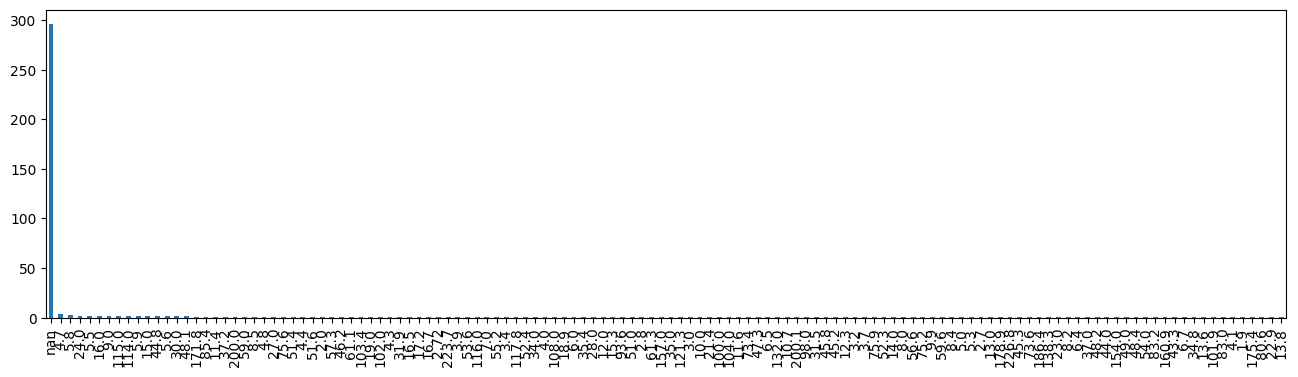

Sodium_2019 - min:1.9, max:226.8, mean:49.16819444444444, median:31.7
--------------


<AxesSubplot:>

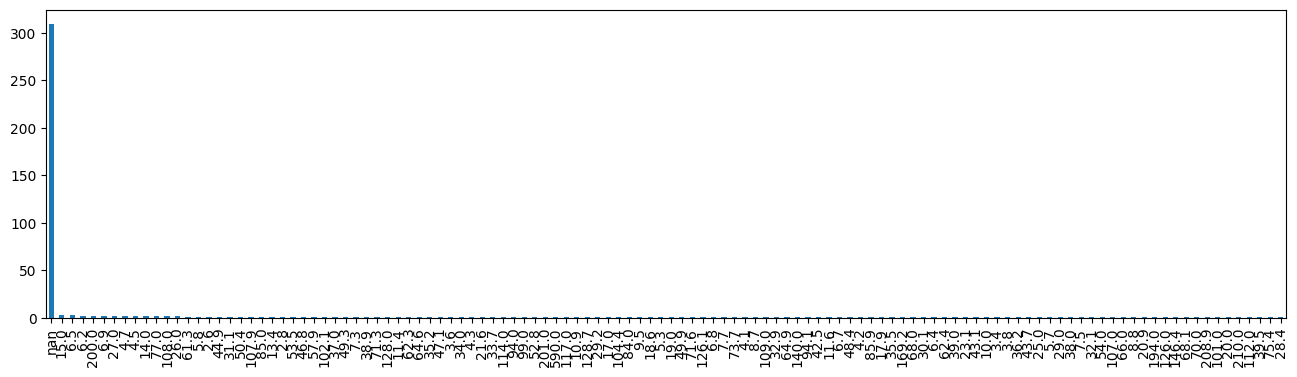

Sodium_2020 - min:2.6, max:590.0, mean:56.4648854961832, median:36.2
--------------


<AxesSubplot:>

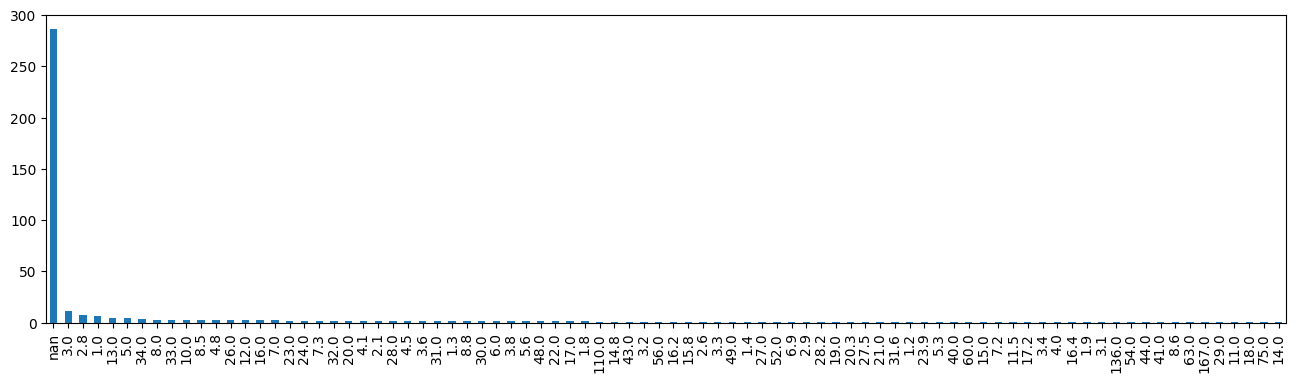

Sulphate_2019 - min:1.0, max:167.0, mean:17.73181818181818, median:9.4
--------------


<AxesSubplot:>

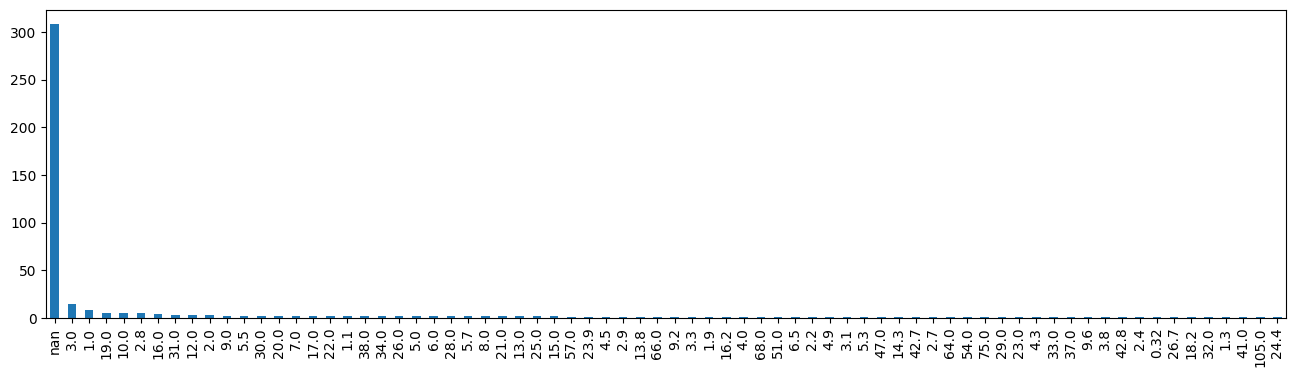

Sulphate_2020 - min:0.32, max:105.0, mean:16.347121212121213, median:10.0
--------------


<AxesSubplot:>

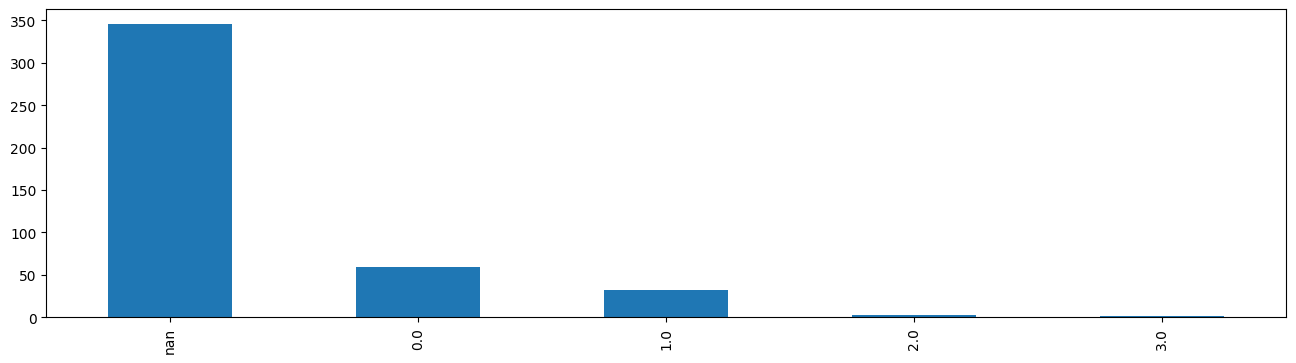

Taste-ball-units_2019 - min:0.0, max:3.0, mean:0.4148936170212766, median:0.0
--------------


<AxesSubplot:>

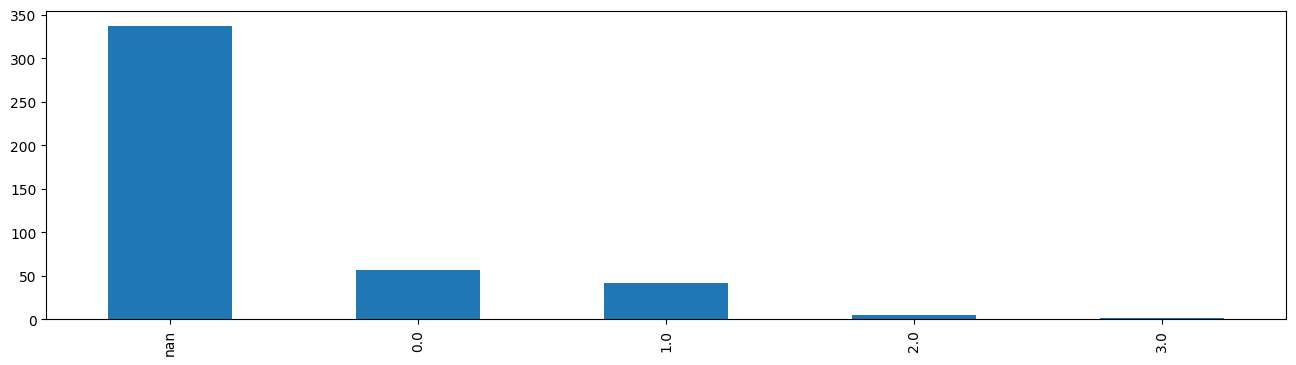

Taste-ball-units_2020 - min:0.0, max:3.0, mean:0.5242718446601942, median:0.0
--------------


<AxesSubplot:>

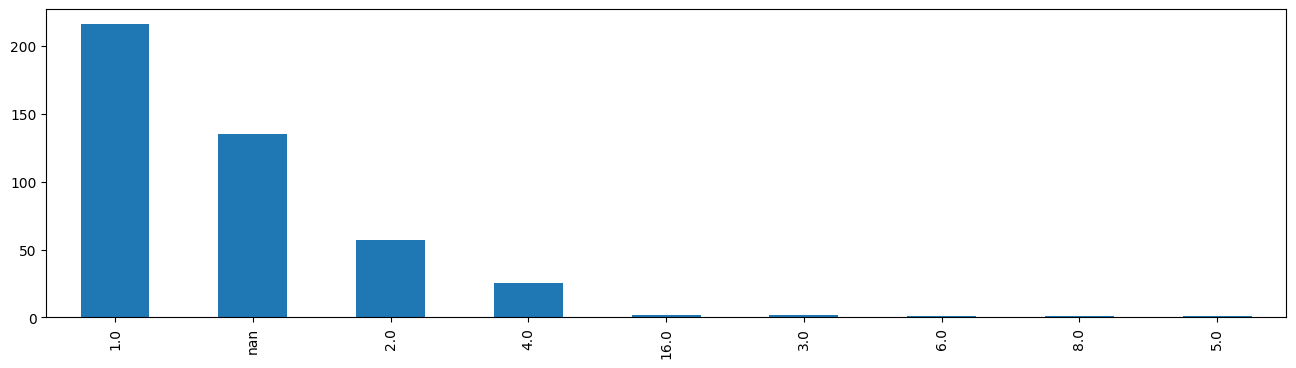

Taste-dilution-degree_2019 - min:1.0, max:16.0, mean:1.5967213114754097, median:1.0
--------------


<AxesSubplot:>

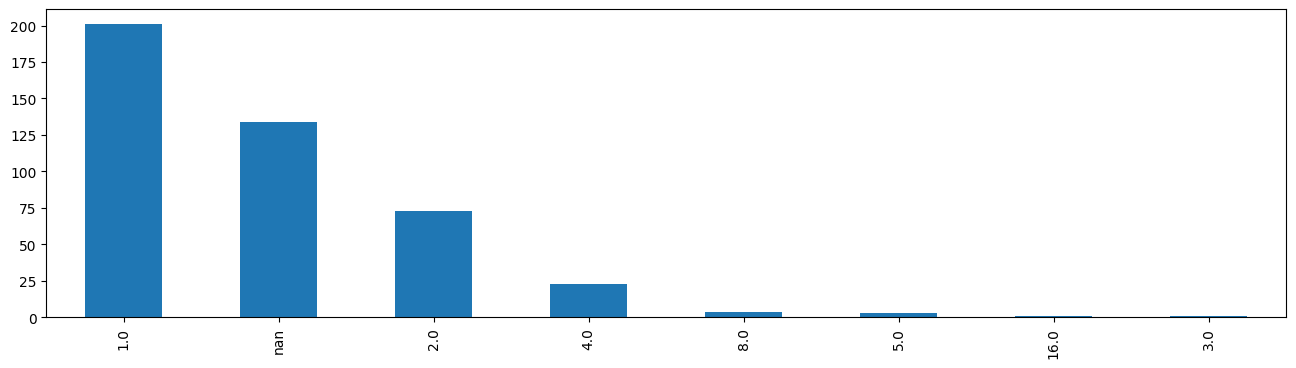

Taste-dilution-degree_2020 - min:1.0, max:16.0, mean:1.6503267973856208, median:1.0
--------------


<AxesSubplot:>

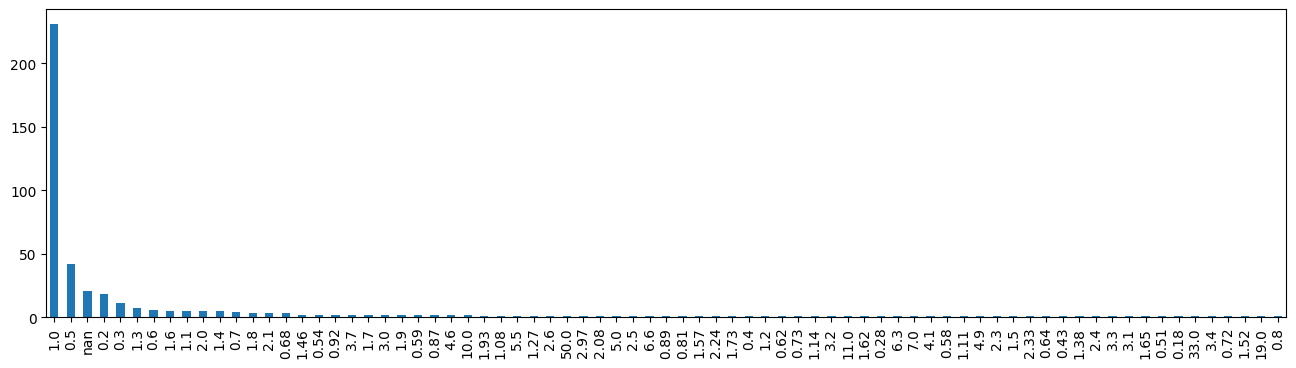

Turbidity-NTU_2019 - min:0.18, max:50.0, mean:1.4040811455847253, median:1.0
--------------


<AxesSubplot:>

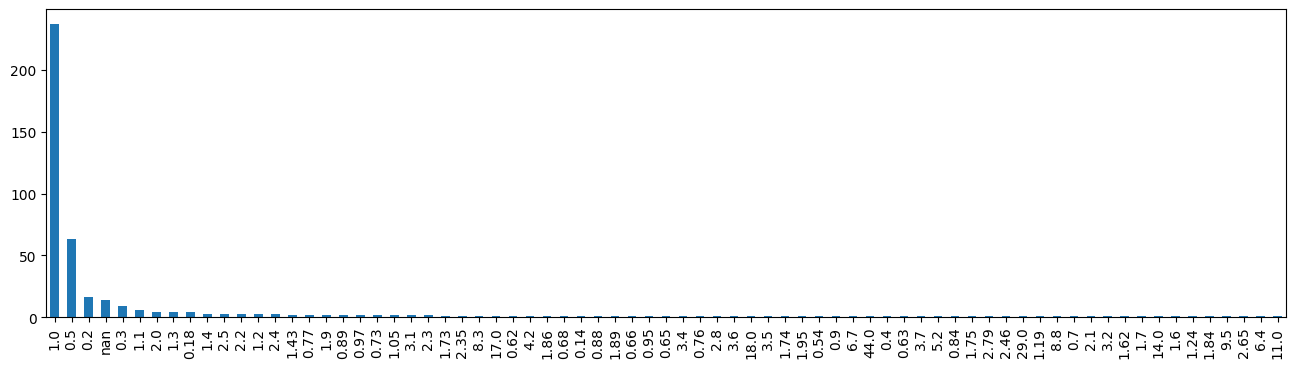

Turbidity-NTU_2020 - min:0.14, max:44.0, mean:1.3953286384976529, median:1.0
--------------


<AxesSubplot:>

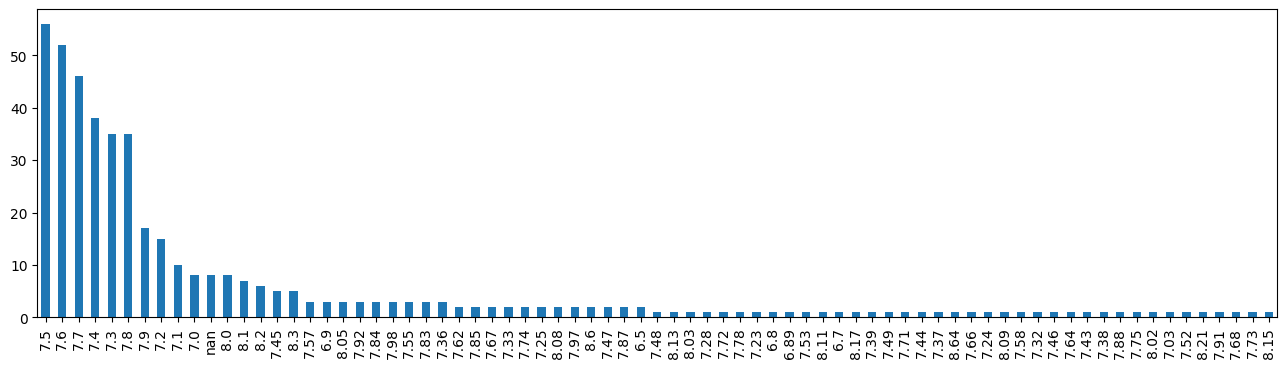

pH _2019 - min:6.5, max:8.64, mean:7.5868518518518515, median:7.6
--------------


<AxesSubplot:>

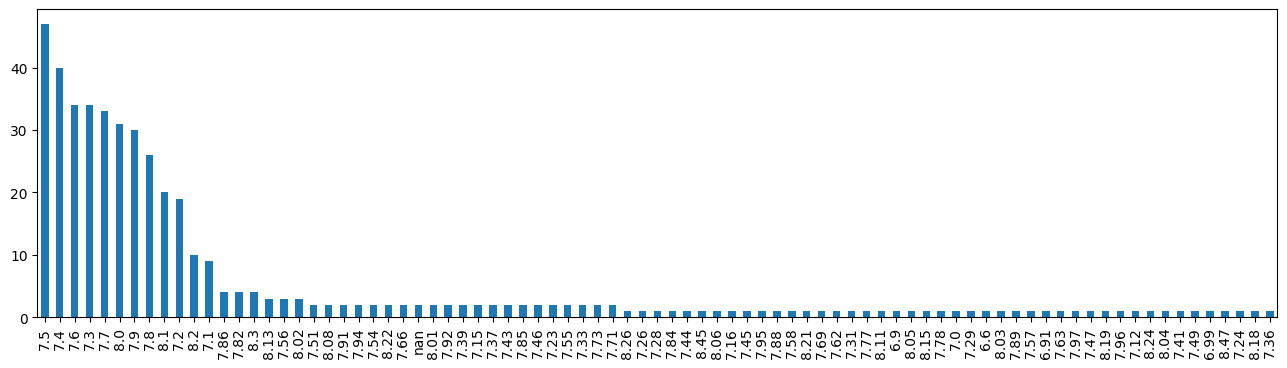

pH _2020 - min:6.6, max:8.47, mean:7.652922374429225, median:7.6
--------------


<AxesSubplot:>

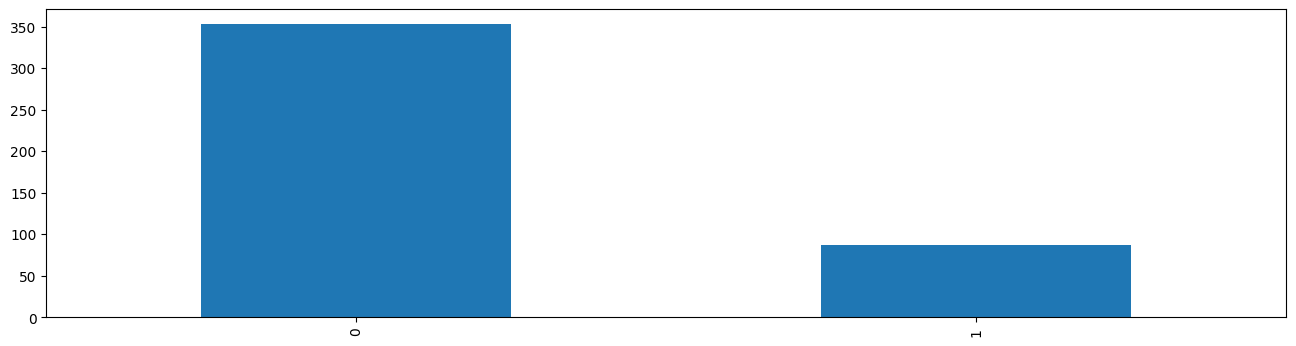

compliance_2019 - min:0, max:1, mean:0.19772727272727272, median:0.0
--------------


<AxesSubplot:>

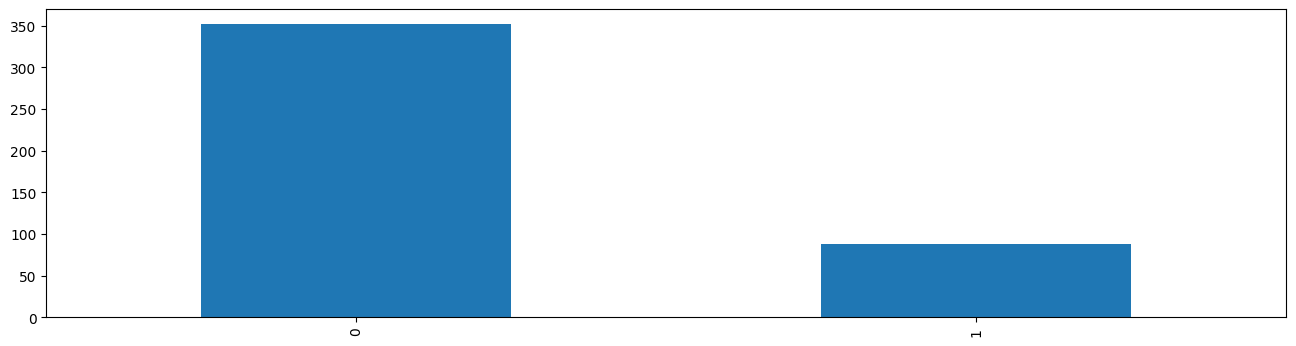

compliance_2020 - min:0, max:1, mean:0.2, median:0.0
--------------


<AxesSubplot:>

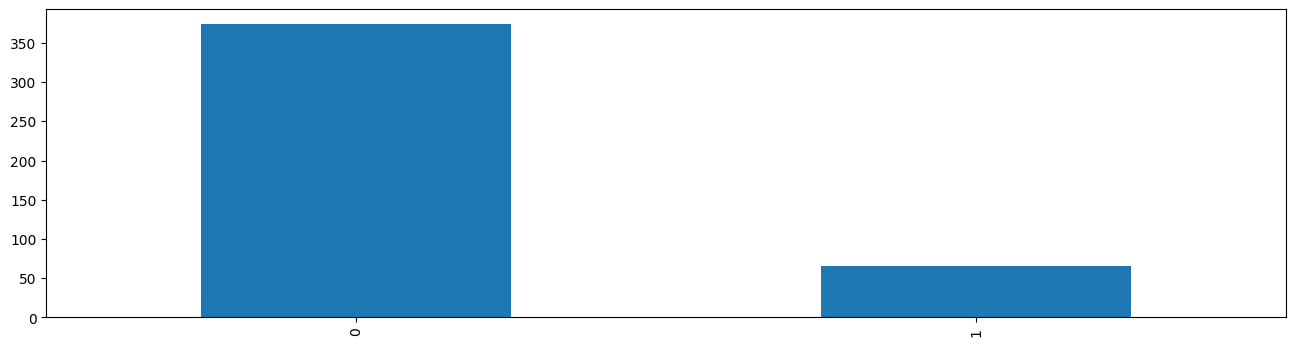

compliance_2021 - min:0, max:1, mean:0.15, median:0.0
--------------


In [54]:
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
plt.rcParams['figure.figsize'] = [16, 4]

# print/plot/etc. for analysis
for col in df.columns:
  #display(df[col].value_counts(dropna=False))
  d = df[col]
  display(d.value_counts(dropna=False).plot.bar())
  plt.show()
  dv = d.values[~np.isnan(d.values)]
  print(f'{col} - min:{d.min()}, max:{d.max()}, mean:{d.mean()}, median:{d.median()}')
  print("--------------")

In [33]:
def preprocess(df):
  if 'station_id' in df.columns:
    df = df.drop('station_id', axis=1)

  # replace nan values with the trimmed median of the column
  for col in df.columns:
    dv = d.values[~np.isnan(d.values)]
    df[col] = df[col].fillna(df[col].median())
  return df

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('compliance_2021', axis=1)
y = df['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [35]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

# 0.83 accuracy, up from 0.82 accuracy with fillna=0
# could this just be the ph level affecting the result? most other values can be 0 or very close and in compliance.
# kaggle_test_copy = preprocess(kaggle_test)
# pred = model.predict(kaggle_test_copy)
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
# submission.to_csv('svc_linear.csv', index=False)

0.7840909090909091

In [36]:
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma='auto', random_state=0xC0FFEE)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

pred = model.predict(preprocess(kaggle_test))
print(pred)
#70% kaggle
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('svc_poly.csv', index=False)

0.7159090909090909
[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0
 0 0 1 0]


In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=0xC0FFEE)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

pred = model.predict(preprocess(kaggle_test))
print(pred)
#91% kaggle
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('decisiontree_entropy.csv', index=False)

0.7727272727272727
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0]


In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy', random_state=0xC0FFEE)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


pred = model.predict(preprocess(kaggle_test))
print(pred)

#91% kaggle
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
submission.to_csv('randomforest_entropy.csv', index=False)

0.8522727272727273
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0]


In [39]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)
pred = model.predict(xgb.DMatrix(kaggle_test_copy))
submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': np.round(pred).astype(int)})
submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.85493	eval-auc:0.58114
[1]	train-auc:0.89771	eval-auc:0.50164
[2]	train-auc:0.92198	eval-auc:0.54221
[3]	train-auc:0.92394	eval-auc:0.51809
[4]	train-auc:0.96678	eval-auc:0.48629
[5]	train-auc:0.97045	eval-auc:0.52686
[6]	train-auc:0.96986	eval-auc:0.54057
[7]	train-auc:0.97614	eval-auc:0.51151
[8]	train-auc:0.98366	eval-auc:0.47917
[9]	train-auc:0.98981	eval-auc:0.50658
[10]	train-auc:0.99447	eval-auc:0.48575
[11]	train-auc:0.99466	eval-auc:0.48904
[12]	train-auc:0.99745	eval-auc:0.48246
[13]	train-auc:0.99901	eval-auc:0.47917
[14]	train-auc:0.99963	eval-auc:0.47807
[15]	train-auc:0.99957	eval-auc:0.47478
[16]	train-auc:0.99988	eval-auc:0.48575
[17]	train-auc:0.99988	eval-auc:0.47368
[18]	train-auc:1.00000	eval-auc:0.47697
[19]	train-auc:1.00000	eval-auc:0.47149
[20]	train-auc:1.00000	eval-auc:0.48794
[21]	train-auc:1.00000	eval-auc:0.47368
[22]	train-auc:1.00000	eval-auc:0.47917
[23]	train-auc:1.00000	eval-auc:0.47807
[24]	train-auc:1.00000	eval-auc:0.48355
[25]	train

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


# 3 balancing data

Preprocessing

In [43]:
import pandas as pd
train_data_url = 'https://drive.google.com/uc?id=1bJjSZDAfn7UbX2xt0I-VmsLAjk9n7IXh'
kaggle_test_url = 'https://drive.google.com/uc?id=1SH_Xo_MjrLuMICFmpD4exHFrN8YbeRE8'
df = pd.read_csv(train_data_url, delimiter=',')
df_kaggle_orig = pd.read_csv(kaggle_test_url, delimiter=',')

In [44]:
import numpy as np
from scipy import stats
def preprocess(df):
  if 'station_id' in df.columns:
    df = df.drop('station_id', axis=1)

  # replace nan values with the trimmed mean of the column
  for col in df.columns:
    dv = df.values[~np.isnan(df.values)]
    df[col] = df[col].fillna(df[col].median())
  return df

In [45]:
from sklearn.model_selection import train_test_split

minority_class = df[df['compliance_2021'] == 1]
majority_class = df[df['compliance_2021'] == 0].sample(len(minority_class), random_state=0xC0FFEE)

df_balanced = pd.concat([minority_class, majority_class])
df_balanced.sort_index(inplace=True)

X = df_balanced.drop('compliance_2021', axis=1)
y = df_balanced['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0xC0FFEE)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

df_kaggle = preprocess(df_kaggle_orig)

In [46]:
y_test

120    1
337    0
23     0
89     1
320    1
7      0
312    0
316    0
180    1
399    1
250    1
6      0
429    1
401    0
35     1
158    0
110    1
374    1
235    1
247    0
126    1
276    0
243    1
131    0
200    1
304    0
47     0
Name: compliance_2021, dtype: int64

Training models

In [47]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.predict(df_kaggle)


#pred = model.predict(df_kaggle)
# submission = pd.DataFrame({'station_id': kaggle_test['station_id'], 'compliance_2021': pred})
# submission.to_csv('svc_linear.csv', index=False)

0.5555555555555556


array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [48]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)
# worse than xgb with all the data
pred = model.predict(xgb.DMatrix(df_kaggle))
submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'], 'compliance_2021': np.round(pred).astype(int)})
submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.94448	eval-auc:0.66484
[1]	train-auc:0.97206	eval-auc:0.74451
[2]	train-auc:0.98240	eval-auc:0.71154
[3]	train-auc:0.98549	eval-auc:0.68681
[4]	train-auc:0.99347	eval-auc:0.67582
[5]	train-auc:0.99565	eval-auc:0.67582
[6]	train-auc:0.99528	eval-auc:0.69231
[7]	train-auc:0.99601	eval-auc:0.68681
[8]	train-auc:0.99710	eval-auc:0.69231
[9]	train-auc:0.99782	eval-auc:0.67582
[10]	train-auc:0.99927	eval-auc:0.65934
[11]	train-auc:1.00000	eval-auc:0.65385
[12]	train-auc:1.00000	eval-auc:0.63187
[13]	train-auc:1.00000	eval-auc:0.64835
[14]	train-auc:1.00000	eval-auc:0.65934
[15]	train-auc:1.00000	eval-auc:0.65385
[16]	train-auc:1.00000	eval-auc:0.65934
[17]	train-auc:1.00000	eval-auc:0.66484
[18]	train-auc:1.00000	eval-auc:0.65934
[19]	train-auc:1.00000	eval-auc:0.67033
[20]	train-auc:1.00000	eval-auc:0.67582
[21]	train-auc:1.00000	eval-auc:0.65934
[22]	train-auc:1.00000	eval-auc:0.65385
[23]	train-auc:1.00000	eval-auc:0.64835
[24]	train-auc:1.00000	eval-auc:0.66484
[25]	train

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [49]:
##balance with duplicating test
from sklearn.model_selection import train_test_split

minority_class = df[df['compliance_2021'] == 1]
majority_class = df[df['compliance_2021'] == 0]

df_balanced = pd.concat([minority_class, minority_class, minority_class, minority_class, minority_class, majority_class])
df_balanced.sort_index(inplace=True)

X = df_balanced.drop('compliance_2021', axis=1)
y = df_balanced['compliance_2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0xC0FFEE)
X_train = preprocess(X_train)
X_test = preprocess(X_test)

df_kaggle = preprocess(df_kaggle_orig)

In [50]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.predict(df_kaggle)

0.624113475177305


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [51]:
from numpy.random.mtrand import random_sample
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8085106382978723

In [52]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:logistic'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

# same result as xgb without data balancing with duplication
pred = model.predict(xgb.DMatrix(df_kaggle))
submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'], 'compliance_2021': np.round(pred).astype(int)})
submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.93629	eval-auc:0.83209
[1]	train-auc:0.97047	eval-auc:0.89139
[2]	train-auc:0.98347	eval-auc:0.90591
[3]	train-auc:0.98942	eval-auc:0.90510
[4]	train-auc:0.99369	eval-auc:0.90672
[5]	train-auc:0.99426	eval-auc:0.91438
[6]	train-auc:0.99488	eval-auc:0.90621
[7]	train-auc:0.99673	eval-auc:0.92749
[8]	train-auc:0.99726	eval-auc:0.93929
[9]	train-auc:0.99913	eval-auc:0.95401
[10]	train-auc:0.99932	eval-auc:0.95845
[11]	train-auc:0.99973	eval-auc:0.96430
[12]	train-auc:0.99996	eval-auc:0.96511
[13]	train-auc:1.00000	eval-auc:0.96511
[14]	train-auc:1.00000	eval-auc:0.96511
[15]	train-auc:1.00000	eval-auc:0.96168
[16]	train-auc:1.00000	eval-auc:0.95946
[17]	train-auc:1.00000	eval-auc:0.96793
[18]	train-auc:1.00000	eval-auc:0.96793
[19]	train-auc:1.00000	eval-auc:0.96571
[20]	train-auc:1.00000	eval-auc:0.97136
[21]	train-auc:1.00000	eval-auc:0.97055
[22]	train-auc:1.00000	eval-auc:0.97196
[23]	train-auc:1.00000	eval-auc:0.97156
[24]	train-auc:1.00000	eval-auc:0.97176
[25]	train

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[46]	train-auc:1.00000	eval-auc:0.99133
[47]	train-auc:1.00000	eval-auc:0.99173
[48]	train-auc:1.00000	eval-auc:0.99133
[49]	train-auc:1.00000	eval-auc:0.99173
[50]	train-auc:1.00000	eval-auc:0.99012
[51]	train-auc:1.00000	eval-auc:0.99032
[52]	train-auc:1.00000	eval-auc:0.99113
[53]	train-auc:1.00000	eval-auc:0.99254
[54]	train-auc:1.00000	eval-auc:0.99173
[55]	train-auc:1.00000	eval-auc:0.99113
[56]	train-auc:1.00000	eval-auc:0.99052
[57]	train-auc:1.00000	eval-auc:0.99153
[58]	train-auc:1.00000	eval-auc:0.99133
[59]	train-auc:1.00000	eval-auc:0.99052
[60]	train-auc:1.00000	eval-auc:0.99052
[61]	train-auc:1.00000	eval-auc:0.99052
[62]	train-auc:1.00000	eval-auc:0.99133
[63]	train-auc:1.00000	eval-auc:0.99133
[64]	train-auc:1.00000	eval-auc:0.99133
[65]	train-auc:1.00000	eval-auc:0.99133
[66]	train-auc:1.00000	eval-auc:0.99092
[67]	train-auc:1.00000	eval-auc:0.98931
[68]	train-auc:1.00000	eval-auc:0.98971
[69]	train-auc:1.00000	eval-auc:0.98971
[70]	train-auc:1.00000	eval-auc:0.99012


In [53]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

param = {'eval_metric': 'auc', 'num_class': 1, 'objective': 'binary:hinge'}
eval_list = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(param, dtrain, 500, eval_list, early_stopping_rounds=50, verbose_eval=True)

# same result as xgb without data balancing with duplication
pred = model.predict(xgb.DMatrix(df_kaggle))
pred.astype(int)
# submission = pd.DataFrame({'station_id': df_kaggle_orig['station_id'], 'compliance_2021': np.round(pred).astype(int)})
# submission.to_csv('xgb_auc.csv', index=False)

[0]	train-auc:0.50000	eval-auc:0.50000
[1]	train-auc:0.75930	eval-auc:0.75504
[2]	train-auc:0.89312	eval-auc:0.79699
[3]	train-auc:0.91359	eval-auc:0.85105
[4]	train-auc:0.92193	eval-auc:0.81797
[5]	train-auc:0.92359	eval-auc:0.85781
[6]	train-auc:0.95359	eval-auc:0.85175
[7]	train-auc:0.96193	eval-auc:0.84893
[8]	train-auc:0.96693	eval-auc:0.87878
[9]	train-auc:0.96859	eval-auc:0.84217
[10]	train-auc:0.97026	eval-auc:0.88624
[11]	train-auc:0.98263	eval-auc:0.85639
[12]	train-auc:0.98263	eval-auc:0.89300
[13]	train-auc:0.98596	eval-auc:0.86739
[14]	train-auc:0.98596	eval-auc:0.90934
[15]	train-auc:0.99333	eval-auc:0.90258
[16]	train-auc:1.00000	eval-auc:0.91610
[17]	train-auc:0.99833	eval-auc:0.90258
[18]	train-auc:0.99833	eval-auc:0.88907
[19]	train-auc:0.99833	eval-auc:0.87555
[20]	train-auc:1.00000	eval-auc:0.88907
[21]	train-auc:1.00000	eval-auc:0.87555
[22]	train-auc:1.00000	eval-auc:0.88907
[23]	train-auc:1.00000	eval-auc:0.87555
[24]	train-auc:1.00000	eval-auc:0.88907
[25]	train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])